## 1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
import matplotlib.ticker as ticker
from sklearn import preprocessing

## 2. Importing the Dataset 

In [ ]:
pd.set_option('display.max_columns', None) ## Displays all the columns in the df
pd.set_option('display.max_rows', None) ## Displays all the rows in the df

# Read the CSV files into dataframes
df_description = pd.read_csv("/content/drive/MyDrive/ML-dr_ali_habib/DescriptionDataCoSupplyChain.csv")
df_raw = pd.read_csv("/content/drive/MyDrive/ML-dr_ali_habib/DataCoSupplyChainDataset.csv", encoding='latin-1')


In [ ]:
df_description ## Description of the columns in df_raw

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer
5,Delivery Status,: Delivery status of orders: Advance shipping...
6,Late_delivery_risk,: Categorical variable that indicates if send...
7,Category Id,: Product category code
8,Category Name,: Description of the product category
9,Customer City,: City where the customer made the purchase


In [ ]:
df_raw.head(3) #Display the first 3 rows in the df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


**Let's take df_raw as the main dataset upon which the analysis is to be performed**

## 3. Data Cleaning

### 3.1 Drop unnecessary columns
Let's drop the following columns as they are redundant or unimportant for analysis:

Product Description
, Product Image 
, Customer Lname
, Customer Fname
, Customer Email 
, Customer Password 

In [ ]:
# Create a copy of df_raw
df_raw_copy = df_raw.copy()

#### 3.1.1 Identifying the columns to be dropped

In [ ]:
# Let's add the missing values to df_description in order to get a picture of which columns to drop
missing_values = df_raw_copy.isnull().sum()

# Create a missing_values column in df_description
df_description['missing_values'] = df_description['FIELDS'].map(missing_values)


In [ ]:
df_description # Description of df


,FIELDS,DESCRIPTION,missing_values
0,Type,: Type of transaction made,0.0
1,Days for shipping (real),: Actual shipping days of the purchased product,NaN
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...,0.0
3,Benefit per order,: Earnings per order placed,0.0
4,Sales per customer,: Total sales per customer made per customer,0.0
5,Delivery Status,: Delivery status of orders: Advance shipping...,0.0
6,Late_delivery_risk,: Categorical variable that indicates if send...,NaN
7,Category Id,: Product category code,0.0
8,Category Name,: Description of the product category,0.0
9,Customer City,: City where the customer made the purchase,0.0


In [ ]:
# Export df_description as CSV
df_description.to_csv('df_description_with_missing_values.csv', index=False)

In [ ]:
df_description.shape # Row and Columns in df

(52, 3)

In [ ]:
# Drop specified columns from df_raw_copy
columns_to_drop = ['Product Description', 'Product Image', 'Customer Lname', 'Customer Fname', 'Customer Email', 'Customer Password','Order Zipcode']
df_raw_copy.drop(columns=columns_to_drop, inplace=True)

# Print df_raw_copy after dropping columns
print(df_raw_copy.columns)


Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Street', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'Order Customer Id', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode'],
      dtype

In [ ]:
df_raw_copy.shape #Rows and Columns

(180519, 46)

In [ ]:
# Export df_description as CSV
df_raw_copy.to_csv('df_clean.csv', index=False)

### 3.2 Identifying the missing values

In [ ]:
# Check for missing values
missing_values = df_raw_copy.isnull().sum()

# Print results
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount     

**Columns with missing Values (Number of missing values and the percentage of missing values):**
1. Customer Zipcode :                      3 (0.001662%)
A very small percent of the data is missing. Therefore we can drop the rows with the missing values.


In [ ]:
# Drop rows with missing values in "Customer Zipcode" column
df_raw_copy.dropna(subset=["Customer Zipcode"], inplace=True)

In [ ]:
# Remove spaces in column names with underscore for ease of use
df_raw_copy.columns = df_raw_copy.columns.str.replace(" ", "_")

In [ ]:
# Create a final DataFrame df from df_raw_copy
df = df_raw_copy.copy()
df_analysis = df.copy()

## 4. Exploratory Data Analysis

### 4.1 Number of rows and columns

In [ ]:
df_analysis.shape ## Get the number of rows and columns

(180516, 46)

- **Number of rows = 180516**
- **Number of columns = 46**

<ipython-input-18-c76fdc88b43e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_analysis.corr()


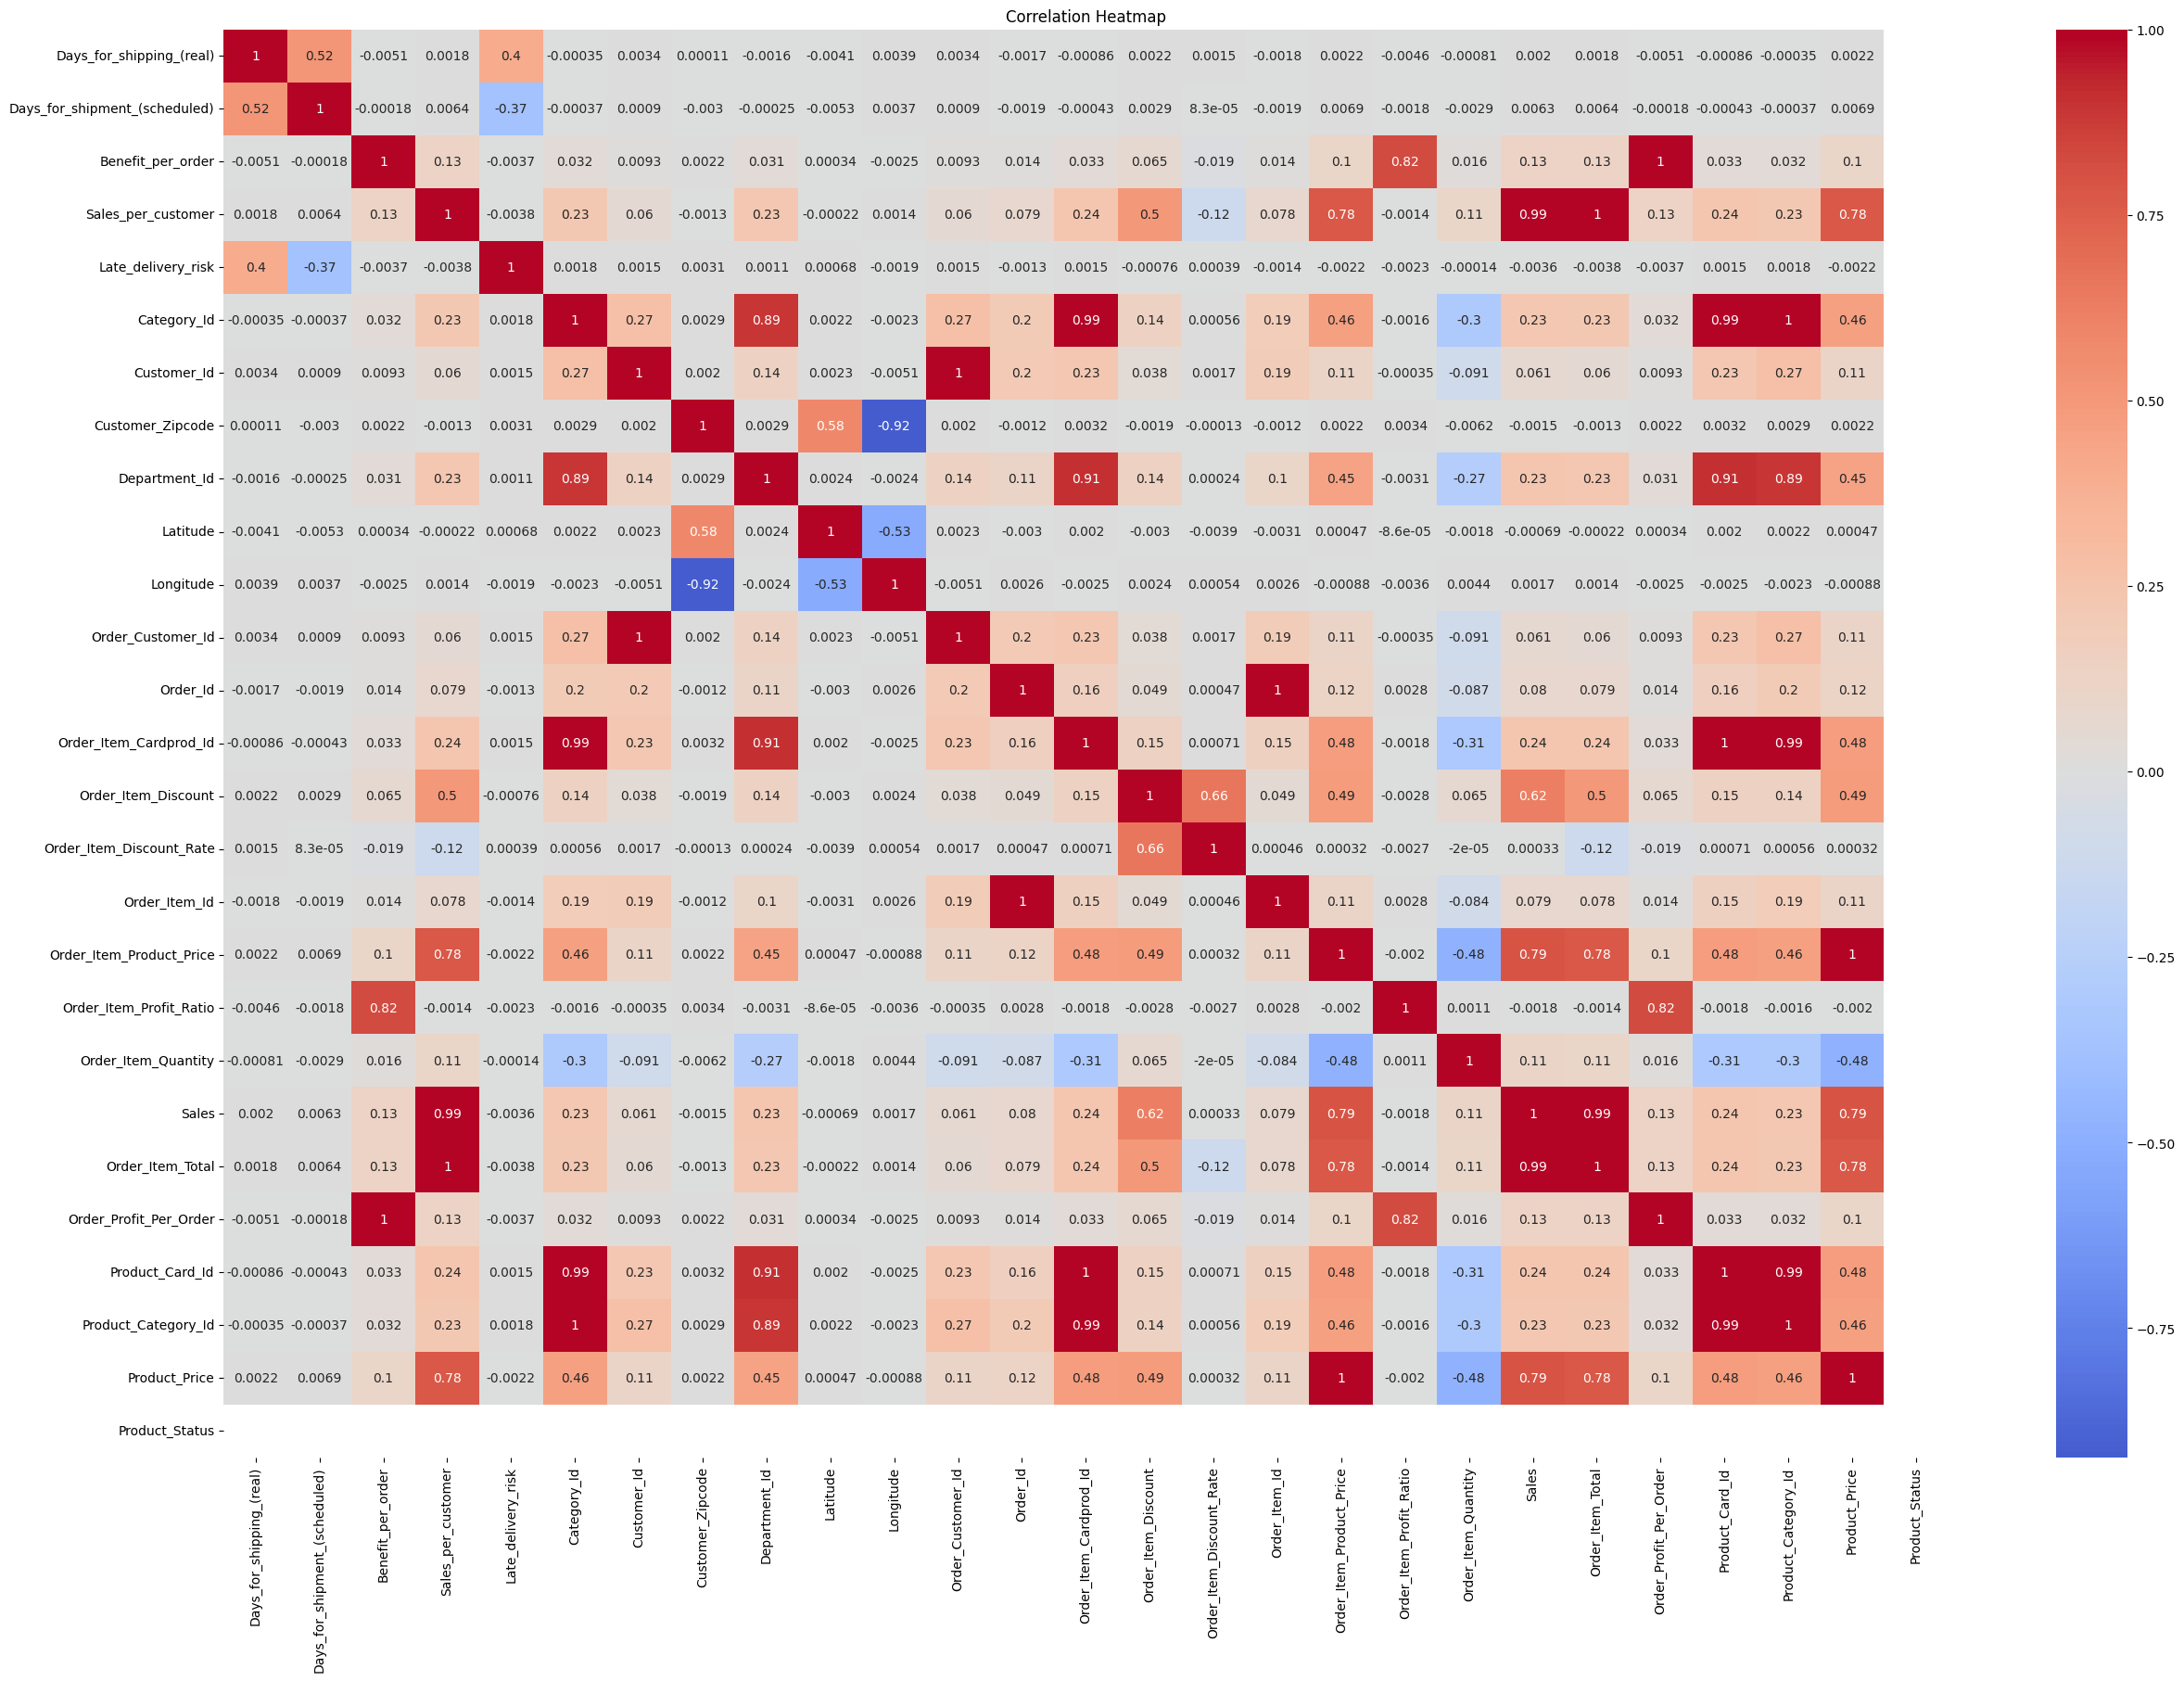

In [ ]:
# Calculate correlation matrix
correlation = df_analysis.corr()

# Create correlation heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### 4.2 Let's get some information on the columns in our df

In [ ]:
df_analysis.columns # column names 

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)',
       'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status',
       'Late_delivery_risk', 'Category_Id', 'Category_Name', 'Customer_City',
       'Customer_Country', 'Customer_Id', 'Customer_Segment', 'Customer_State',
       'Customer_Street', 'Customer_Zipcode', 'Department_Id',
       'Department_Name', 'Latitude', 'Longitude', 'Market', 'Order_City',
       'Order_Country', 'Order_Customer_Id', 'order_date_(DateOrders)',
       'Order_Id', 'Order_Item_Cardprod_Id', 'Order_Item_Discount',
       'Order_Item_Discount_Rate', 'Order_Item_Id', 'Order_Item_Product_Price',
       'Order_Item_Profit_Ratio', 'Order_Item_Quantity', 'Sales',
       'Order_Item_Total', 'Order_Profit_Per_Order', 'Order_Region',
       'Order_State', 'Order_Status', 'Product_Card_Id', 'Product_Category_Id',
       'Product_Name', 'Product_Price', 'Product_Status',
       'shipping_date_(DateOrders)', 'Shipping_Mode'],
      dtype

In [ ]:
df_analysis.info()  # Information about the data in the df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180516 entries, 0 to 180518
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180516 non-null  object 
 1   Days_for_shipping_(real)       180516 non-null  int64  
 2   Days_for_shipment_(scheduled)  180516 non-null  int64  
 3   Benefit_per_order              180516 non-null  float64
 4   Sales_per_customer             180516 non-null  float64
 5   Delivery_Status                180516 non-null  object 
 6   Late_delivery_risk             180516 non-null  int64  
 7   Category_Id                    180516 non-null  int64  
 8   Category_Name                  180516 non-null  object 
 9   Customer_City                  180516 non-null  object 
 10  Customer_Country               180516 non-null  object 
 11  Customer_Id                    180516 non-null  int64  
 12  Customer_Segment              

In [ ]:
# Get quantitative columns
quantitative_columns = df_analysis.select_dtypes(include='number').columns.tolist()
num_quantitative_columns = len(quantitative_columns)

# Get categorical columns
categorical_columns = df_analysis.select_dtypes(include='object').columns.tolist()
num_categorical_columns = len(categorical_columns)



In [ ]:
# Print results
print("Quantitative Columns:")
print(quantitative_columns)
print("Number of Quantitative Columns: {}".format(num_quantitative_columns))
print("\nCategorical Columns:")
print(categorical_columns)
print("Number of Categorical Columns: {}".format(num_categorical_columns))

Quantitative Columns:
['Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)', 'Benefit_per_order', 'Sales_per_customer', 'Late_delivery_risk', 'Category_Id', 'Customer_Id', 'Customer_Zipcode', 'Department_Id', 'Latitude', 'Longitude', 'Order_Customer_Id', 'Order_Id', 'Order_Item_Cardprod_Id', 'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Order_Item_Id', 'Order_Item_Product_Price', 'Order_Item_Profit_Ratio', 'Order_Item_Quantity', 'Sales', 'Order_Item_Total', 'Order_Profit_Per_Order', 'Product_Card_Id', 'Product_Category_Id', 'Product_Price', 'Product_Status']
Number of Quantitative Columns: 27

Categorical Columns:
['Type', 'Delivery_Status', 'Category_Name', 'Customer_City', 'Customer_Country', 'Customer_Segment', 'Customer_State', 'Customer_Street', 'Department_Name', 'Market', 'Order_City', 'Order_Country', 'order_date_(DateOrders)', 'Order_Region', 'Order_State', 'Order_Status', 'Product_Name', 'shipping_date_(DateOrders)', 'Shipping_Mode']
Number of Categorical Columns

**We see that there are 27 Quantitative columns and 19 Categorical columns**

## 5. Let's analyze the dataset for following insights:
1. Sales and Profit Analysis: The columns 'Sales', 'Profit_Per_Order', 'Order_Profit_Per_Order', 'Order_Item_Profit_Ratio', and 'Benefit_per_order' can be used to analyze sales and profit metrics at different levels of aggregation such as overall, by customer, by product category, or by market. This can provide insights into the performance of different segments of the business and identify areas of improvement.

2. Delivery Performance Analysis: The columns 'Delivery_Status', 'Late_delivery_risk', 'Days_for_shipping_(real)', and 'Days_for_shipment_(scheduled)' can be used to analyze the delivery performance of the business. This can provide insights into the efficiency of the supply chain, identify potential delays or bottlenecks, and take necessary actions to improve delivery performance.

3. Customer Analysis: The columns 'Customer_Id', 'Customer_City', 'Customer_State', 'Customer_Country', 'Customer_Segment', 'Customer_Street', and 'Customer_Zipcode' can be used to analyze customer behavior, preferences, and demographics. This can help in understanding customer segmentation, identifying high-value customers, and developing targeted marketing strategies.

4. Product Analysis: The columns 'Product_Category_Id', 'Product_Name', 'Product_Price', 'Product_Status', 'Order_Item_Quantity', 'Order_Item_Product_Price', and 'Order_Item_Total' can be used to analyze product performance, pricing strategies, and product popularity. This can help in identifying top-selling products, analyzing product profitability, and optimizing pricing strategies.

5. Order Analysis: The columns 'Order_Id', 'Order_City', 'Order_State', 'Order_Country', 'Order_Status', 'Order_Customer_Id', 'order_date_(DateOrders)', 'shipping_date_(DateOrders)', 'Shipping_Mode', 'Order_Region', and 'Market' can be used to analyze order patterns, order status, order fulfillment, and shipping modes. This can provide insights into order processing time, order cancellations, shipping performance, and regional demand patterns.

6. Department Analysis: The columns 'Department_Id' and 'Department_Name' can be used to analyze department-wise performance and contribution to overall sales and profit.

7. Geographic Analysis: The columns 'Latitude' and 'Longitude' can be used for geographic analysis, such as identifying customer clusters, analyzing regional sales patterns, and optimizing delivery routes.

### 5.1 Sales and Profit Analysis

In [ ]:
# Calculate Total Sales
df_analysis['Total_Sales'] = df_analysis['Sales']

# Calculate Total Profit
df_analysis['Total_Profit'] = df_analysis['Order_Profit_Per_Order']

In [ ]:
# Group by different levels of aggregation, e.g. overall, by customer, by product category, or by market
# Overall Sales and Profit
overall_sales = df_analysis['Total_Sales'].sum()
overall_profit = df_analysis['Total_Profit'].sum()

In [ ]:
# Sales and Profit by Market
market_sales = df_analysis.groupby('Market')['Total_Sales'].sum()
market_profit = df_analysis.groupby('Market')['Total_Profit'].sum()

In [ ]:
# Print the calculated sales and profit metrics
print("Overall Sales: $", overall_sales)
print("Overall Profit: $", overall_profit)

Overall Sales: $ 36784085.28336885
Overall Profit: $ 3966765.6940515763


In [ ]:
# Create the bar graph
fig = go.Figure()

fig.add_trace(go.Bar(x=['Overall Sales', 'Overall Profit'],
                     y=[overall_sales, overall_profit],
                     marker_color=['blue', 'green'],
                     text=[f"${overall_sales}", f"${overall_profit}"],
                     textposition='inside',
                     ))

fig.update_layout(title='Overall Sales and Overall Profit',
                  xaxis_title='Metric',
                  yaxis_title='Amount ($)',
                  showlegend=False)

fig.show()

In [ ]:
print("\nSales and Profit by Market:")
print(market_sales)
print(market_profit)


Sales and Profit by Market:
Market
Africa          2.294453e+06
Europe          1.087179e+07
LATAM           1.027761e+07
Pacific Asia    8.273704e+06
USCA            5.066529e+06
Name: Total_Sales, dtype: float64
Market
Africa          2.520712e+05
Europe          1.169317e+06
LATAM           1.123322e+06
Pacific Asia    8.577425e+05
USCA            5.643138e+05
Name: Total_Profit, dtype: float64


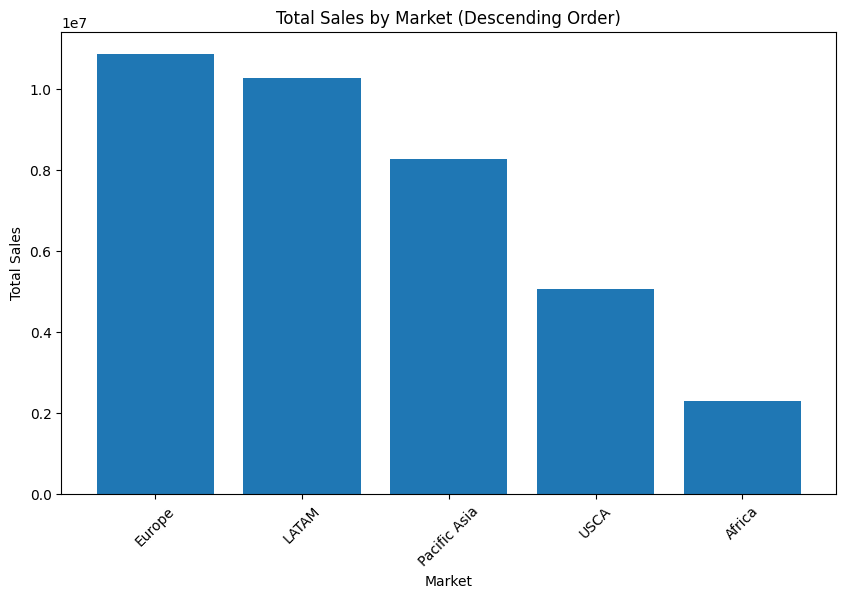

In [ ]:
# Sort the market sales in descending order
market_sales_sorted = market_sales.sort_values(ascending=False)

# Create a bar graph for market sales in descending order
plt.figure(figsize=(10, 6))
plt.bar(market_sales_sorted.index, market_sales_sorted)
plt.xlabel('Market')
plt.ylabel('Total Sales')
plt.title('Total Sales by Market (Descending Order)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Sales in decreasing order: EUROPE, LATAM, Pacific Asia, USCA, Africa

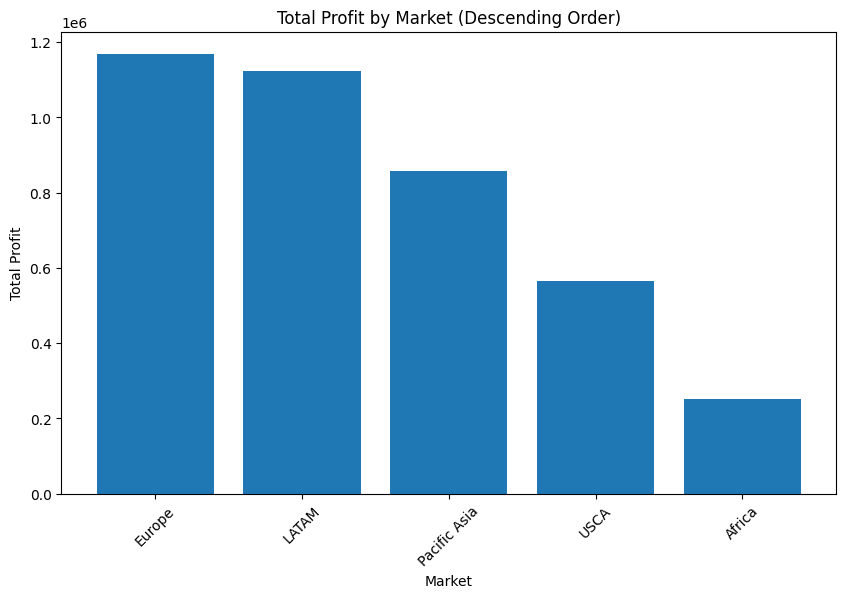

In [ ]:
# Sort the market profit in descending order
market_profit_sorted = market_profit.sort_values(ascending=False)

# Create a bar graph for market profit in descending order
plt.figure(figsize=(10, 6))
plt.bar(market_profit_sorted.index, market_profit_sorted)
plt.xlabel('Market')
plt.ylabel('Total Profit')
plt.title('Total Profit by Market (Descending Order)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Profit in decreasing order: EUROPE, LATAM, Pacific Asia, USCA, AFRICA

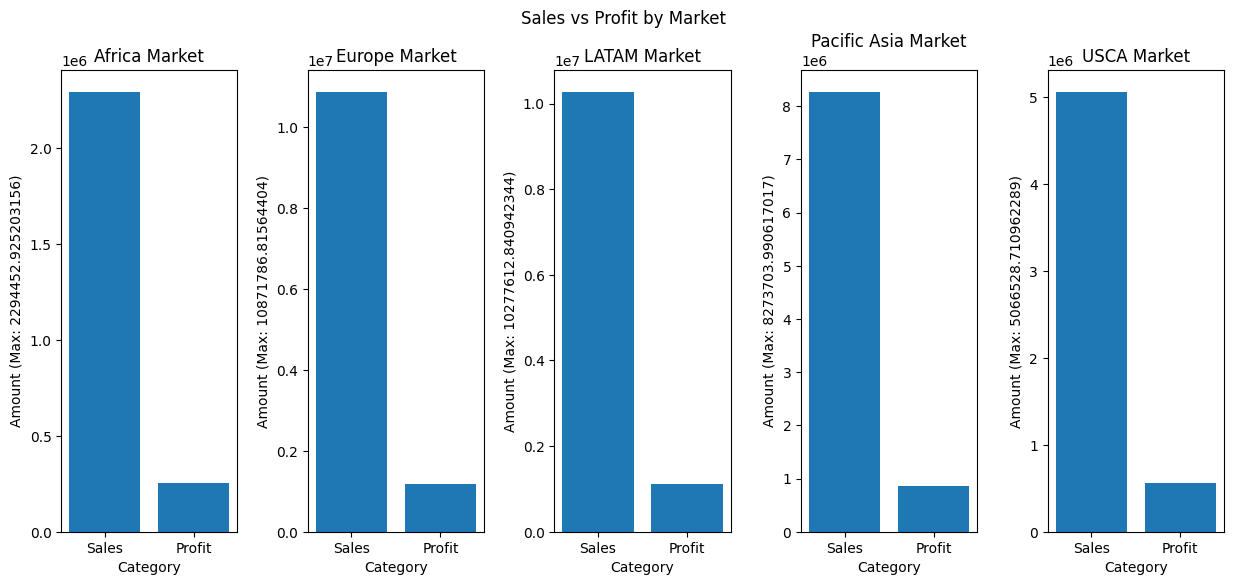

In [ ]:
# Create a figure with subplots for each market
fig, axes = plt.subplots(nrows=1, ncols=len(market_sales), figsize=(15, 6))

# Loop through each market and create a bar graph for sales and profit
for i, market in enumerate(market_sales.index):
    ax = axes[i]  # Get the axes for the current market
    
    # Plot sales and profit for the current market
    ax.bar(['Sales', 'Profit'], [market_sales[market], market_profit[market]])
    
    # Set title and x-axis label
    ax.set_title(f'{market} Market')
    ax.set_xlabel('Category')
    
    # Add y-axis label based on the maximum value of sales and profit
    max_value = max(market_sales[market], market_profit[market])
    ax.set_ylabel(f'Amount (Max: {max_value})')

# Add a common title for all subplots
fig.suptitle('Sales vs Profit by Market')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the graph
plt.show()

#### Conclusions: Sales and Profit Analysis
1. Overall Sales:  $ 36,784,085.28

2. Overall Profit: $ 3,966,765.69

3. Total Sales by Market in decreasing order : EUROPE, LATAM, Pacific Asia, USCA, Africa

4. Total Profit by Market in decreasing order : EUROPE, LATAM, Pacific Asia, USCA, AFRICA

### 5.2 Delivery Performance Analysis

#### 5.2.1 Average delivery time

In [ ]:
# Calculate average delivery time
avg_delivery_time = df_analysis['Days_for_shipping_(real)'].mean()

# Print the result
print(f"Average delivery time: {avg_delivery_time} days")

Average delivery time: 3.497656717410091 days


#### 5.2.2 Late delivery rate

In [ ]:
# Calculate late delivery rate
late_delivery_rate = df_analysis['Late_delivery_risk'].mean() * 100

# Print the result
print(f"Late delivery rate: {late_delivery_rate}%")


Late delivery rate: 54.829488798776836%


#### 5.2.3 Delivery status *breakdown*

In [ ]:
# Calculate the total count of delivery statuses
total_deliveries = df_analysis.shape[0]

# Count the occurrences of each delivery status
delivery_status_count = df_analysis['Delivery_Status'].value_counts()

# Calculate the percentage of each delivery status
delivery_status_percentage = (delivery_status_count / total_deliveries) * 100

# Print the result
print("Delivery Status Breakdown in Percentage:")
print(delivery_status_percentage)

Delivery Status Breakdown in Percentage:
Late delivery        54.829489
Advance shipping     23.040617
Shipping on time     17.834430
Shipping canceled     4.295464
Name: Delivery_Status, dtype: float64


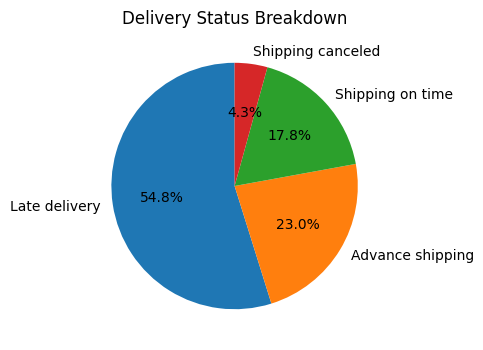

In [ ]:
# Create a pie chart for delivery status breakdown
plt.figure(figsize=(4, 4))
plt.pie(delivery_status_percentage, labels=delivery_status_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Delivery Status Breakdown')
plt.show()

#### 5.2.4 Delivery status by market

In [ ]:
# Group by market and count the occurrences of each delivery status
delivery_status_by_market = df_analysis.groupby('Market')['Delivery_Status'].value_counts()

# Print the result
print("Delivery Status by Market:")
print(delivery_status_by_market)


Delivery Status by Market:
Market        Delivery_Status  
Africa        Late delivery         6340
              Advance shipping      2645
              Shipping on time      2169
              Shipping canceled      460
Europe        Late delivery        27742
              Advance shipping     11604
              Shipping on time      8742
              Shipping canceled     2162
LATAM         Late delivery        28044
              Advance shipping     12039
              Shipping on time      9226
              Shipping canceled     2285
Pacific Asia  Late delivery        22712
              Advance shipping      9473
              Shipping on time      7399
              Shipping canceled     1675
USCA          Late delivery        14138
              Advance shipping      5831
              Shipping on time      4658
              Shipping canceled     1172
Name: Delivery_Status, dtype: int64


<Figure size 1200x800 with 0 Axes>

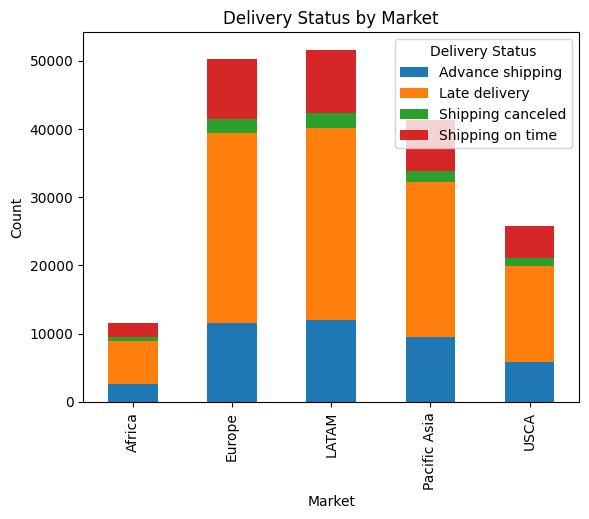

In [ ]:
# Create a bar graph for delivery status by market
plt.figure(figsize=(12, 8))
delivery_status_by_market.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Market')
plt.ylabel('Count')
plt.title('Delivery Status by Market')
plt.legend(title='Delivery Status')
plt.show()

Based on the results of the Delivery Status by Market analysis, the following notable observations can be made:

1. Late deliveries: Africa, Europe, LATAM, Pacific Asia, and USCA all experienced late deliveries to varying degrees. Africa and LATAM had the highest number of late deliveries with 6340 and 28044 respectively, followed by Europe with 27742, Pacific Asia with 22712, and USCA with 14138. This indicates a potential issue with delivery delays in these markets that may require further investigation and improvement in supply chain management or logistics.

2. Advance shipping: Europe, LATAM, Pacific Asia, and USCA had a significant number of advance shipping orders, with Europe having the highest at 11604, followed by LATAM with 12039, Pacific Asia with 9473, and USCA with 5831. This suggests that customers in these markets may be willing to pay extra for expedited shipping to ensure timely delivery of their orders, indicating a demand for faster shipping options.

3. Shipping on time: While there were some instances of late deliveries, the majority of orders in all markets were shipped on time. Europe had the highest number of on-time shipments with 8742, followed by LATAM with 9226, Pacific Asia with 7399, USCA with 4658, and Africa with 2169. This indicates that the company has been largely successful in meeting delivery deadlines in these markets, which is a positive indicator of customer satisfaction and efficient logistics management.

4. Shipping cancellations: Africa, Europe, LATAM, Pacific Asia, and USCA all experienced a certain number of shipping cancellations, with LATAM having the highest at 2285, followed by Europe with 2162, Pacific Asia with 1675, USCA with 1172, and Africa with 460. Shipping cancellations could be due to various reasons such as order cancellations, inventory issues, or logistics challenges. High cancellation rates may require further analysis and actions to identify and address the underlying causes.

### 5.3 Customer Analysis

#### Customer Lifetime Value (CLTV) Analysis
Customer Lifetime Value (CLTV) Analysis is a marketing and business metric that measures the predicted total value a customer is expected to bring to a business over the duration of their relationship with that business. It is an estimate of the total revenue a business can expect to generate from a single customer during their entire lifetime as a customer.

In [ ]:
# Calculate customer lifetime
df_analysis['order_date_(DateOrders)'] = pd.to_datetime(df_analysis['order_date_(DateOrders)'])
df_analysis['order_year'] = df_analysis['order_date_(DateOrders)'].dt.year
snapshot_date = df_analysis['order_year'].max()
df_analysis['customer_age'] = snapshot_date - df_analysis['order_year']
df_analysis['customer_lifetime'] = df_analysis.groupby('Customer_Id')['customer_age'].transform('sum')

# Calculate purchase frequency
df_analysis['purchase_frequency'] = df_analysis.groupby('Customer_Id')['Order_Id'].transform('nunique') / df_analysis['customer_lifetime']

# Calculate average purchase value
df_analysis['avg_purchase_value'] = df_analysis.groupby('Customer_Id')['Total_Sales'].transform('sum') / df_analysis.groupby('Customer_Id')['Order_Id'].transform('nunique')

# Calculate CLTV
df_analysis['CLTV'] = df_analysis['purchase_frequency'] * df_analysis['avg_purchase_value'] * df_analysis['customer_lifetime']

# Group by customer and calculate total CLTV
cltv_data = df_analysis.groupby('Customer_Id').agg({'CLTV': 'sum'})

# Sort customers by CLTV in descending order
cltv_data = cltv_data.sort_values('CLTV', ascending=False)

# Print CLTV data
print("Customer Lifetime Value (CLTV) Data:")
print(cltv_data.head())


Customer Lifetime Value (CLTV) Data:
                      CLTV
Customer_Id               
791          452539.317637
5654         418532.659901
9371         409157.329099
2641         392629.569614
1657         387395.826373


In [ ]:
# Export CLTV data as CSV file
cltv_data.to_csv('cltv_data.csv', index=False)

#### Customer Purchase Behavior Analysis
Customer Purchase Behavior Analysis is the process of analyzing and understanding the purchasing patterns, preferences, and behaviors of customers. It involves analyzing various aspects of customer purchasing behavior, such as frequency, recency, monetary value, product preferences, and purchase channels. This analysis provides insights into customer buying habits, trends, and preferences, which can be used to inform marketing, sales, and product strategies.

In [ ]:
# Calculate total sales per customer
total_sales_per_customer = df_analysis.groupby('Customer_Id')['Sales'].sum()
#print("Total Sales per Customer:")
#print(total_sales_per_customer)

# Calculate average order profit per customer
avg_order_profit_per_customer = df_analysis.groupby('Customer_Id')['Order_Profit_Per_Order'].mean()
#print("\nAverage Order Profit per Customer:")
#print(avg_order_profit_per_customer)

# Calculate total quantity of items ordered per customer
total_quantity_ordered_per_customer = df_analysis.groupby('Customer_Id')['Order_Item_Quantity'].sum()
#print("\nTotal Quantity Ordered per Customer:")
#print(total_quantity_ordered_per_customer)

# Calculate average product price per customer
avg_product_price_per_customer = df_analysis.groupby('Customer_Id')['Order_Item_Product_Price'].mean()
#print("\nAverage Product Price per Customer:")
#print(avg_product_price_per_customer)

# Calculate total value of items ordered per customer
total_value_ordered_per_customer = df_analysis.groupby('Customer_Id')['Order_Item_Total'].sum()
#print("\nTotal Value Ordered per Customer:")
#print(total_value_ordered_per_customer)


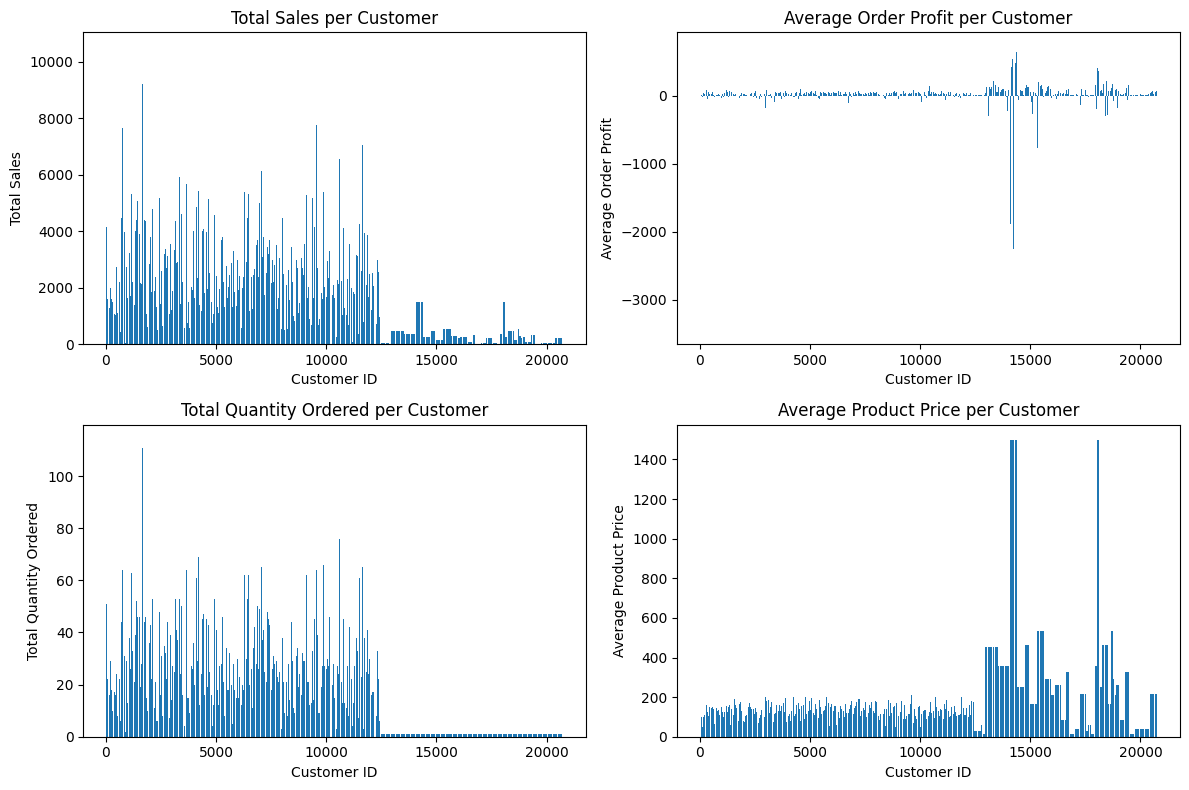

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot total sales per customer
axs[0, 0].bar(total_sales_per_customer.index, total_sales_per_customer.values)
axs[0, 0].set_title('Total Sales per Customer')
axs[0, 0].set_xlabel('Customer ID')
axs[0, 0].set_ylabel('Total Sales')

# Plot average order profit per customer
axs[0, 1].bar(avg_order_profit_per_customer.index, avg_order_profit_per_customer.values)
axs[0, 1].set_title('Average Order Profit per Customer')
axs[0, 1].set_xlabel('Customer ID')
axs[0, 1].set_ylabel('Average Order Profit')

# Plot total quantity of items ordered per customer
axs[1, 0].bar(total_quantity_ordered_per_customer.index, total_quantity_ordered_per_customer.values)
axs[1, 0].set_title('Total Quantity Ordered per Customer')
axs[1, 0].set_xlabel('Customer ID')
axs[1, 0].set_ylabel('Total Quantity Ordered')

# Plot average product price per customer
axs[1, 1].bar(avg_product_price_per_customer.index, avg_product_price_per_customer.values)
axs[1, 1].set_title('Average Product Price per Customer')
axs[1, 1].set_xlabel('Customer ID')
axs[1, 1].set_ylabel('Average Product Price')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


#### Customer Churn Analysis
Customer Churn Analysis is the process of analyzing and understanding customer churn, which refers to the rate at which customers stop doing business with a company or cease their subscription or membership. It involves analyzing customer data to identify patterns and trends that may indicate customers who are at risk of churning, and understanding the underlying reasons for customer attrition.

In [ ]:
# Step 1: Define churn (example: customers who have not made a purchase in the last 30 days)
churn_definition = 'order_date_(DateOrders)'

# Step 2: Calculate churn rate
churned_customers = df_analysis[df_analysis[churn_definition] < (df_analysis[churn_definition].max() - pd.DateOffset(days=30))]
churn_rate = churned_customers['Customer_Id'].nunique() / df_analysis['Customer_Id'].nunique() * 100
print("Churn Rate: {:.2f}%".format(churn_rate))


Churn Rate: 90.04%


The churn rate refers to the percentage of customers or subscribers who discontinue or cancel their relationship with a company within a given period of time. In this case, the churn rate is 90.04%, which means that 90.04% of the company's customers or subscribers have discontinued their relationship with the company during the analyzed period.

In [ ]:
# Step 3: Perform churn analysis
churned_data = df_analysis[df_analysis['Customer_Id'].isin(churned_customers['Customer_Id'])]
non_churned_data = df_analysis[~df_analysis['Customer_Id'].isin(churned_customers['Customer_Id'])]

# Example: Calculate average sales per customer for churned and non-churned customers
avg_sales_per_customer_churned = churned_data.groupby('Customer_Id')['Sales'].mean()
avg_sales_per_customer_non_churned = non_churned_data.groupby('Customer_Id')['Sales'].mean()

print("Average Sales per Customer - Churned: {:.2f}".format(avg_sales_per_customer_churned.mean()))
print("Average Sales per Customer - Non-Churned: {:.2f}".format(avg_sales_per_customer_non_churned.mean()))


Average Sales per Customer - Churned: 248.66
Average Sales per Customer - Non-Churned: 145.21


- According to the given results, the average sales per customer for churned customers is 💲248.66, while the average sales per customer for non-churned customers is 💲145.21. 
- **This suggests that, on average, the company was able to generate higher sales from customers who have churned compared to customers who have not churned.**

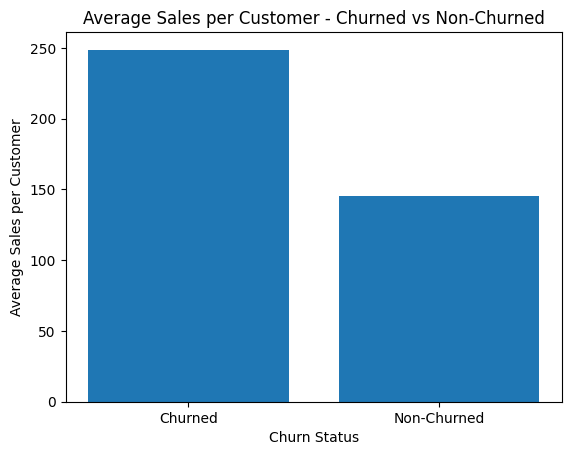

In [ ]:
# Create a bar chart to visualize the average sales per customer for churned and non-churned customers

fig, ax = plt.subplots()
ax.bar(['Churned', 'Non-Churned'], [avg_sales_per_customer_churned.mean(), avg_sales_per_customer_non_churned.mean()])
ax.set_ylabel('Average Sales per Customer')
ax.set_xlabel('Churn Status')
ax.set_title('Average Sales per Customer - Churned vs Non-Churned')
plt.show()


#### Customer Loyalty Analysis
Customer Loyalty Analysis is the process of analyzing and measuring the level of loyalty and satisfaction of customers towards a business or brand. It involves examining customer data to understand customer behaviors, preferences, and attitudes towards the business, and evaluating the effectiveness of loyalty programs or initiatives.

In [ ]:
# Step 1: Define customer loyalty (example: based on repeat purchase behavior)
df_analysis['Repeat_Purchaser'] = df_analysis.groupby('Customer_Id')['Order_Id'].transform('nunique') > 1
customer_loyalty_definition = 'Repeat_Purchaser'

# Step 2: Calculate customer loyalty metrics
repeat_purchase_rate = df_analysis.groupby('Customer_Id')[customer_loyalty_definition].mean()
avg_purchase_frequency = df_analysis.groupby('Customer_Id')['purchase_frequency'].mean()
customer_retention_rate = df_analysis.groupby('Customer_Id')['Customer_Country'].nunique() / df['Customer_Country'].nunique()

avg_repeat_purchase_rate = repeat_purchase_rate.mean()
max_repeat_purchase_rate = repeat_purchase_rate.max()
min_repeat_purchase_rate = repeat_purchase_rate.min()

avg_purchase_frequency = avg_purchase_frequency.mean()
max_purchase_frequency = avg_purchase_frequency.max()
min_purchase_frequency = avg_purchase_frequency.min()

avg_customer_retention_rate = customer_retention_rate.mean()
max_customer_retention_rate = customer_retention_rate.max()
min_customer_retention_rate = customer_retention_rate.min()

print("Average Repeat Purchase Rate: {:.2%}".format(avg_repeat_purchase_rate))
print("Maximum Repeat Purchase Rate: {:.2%}".format(max_repeat_purchase_rate))
print("Minimum Repeat Purchase Rate: {:.2%}".format(min_repeat_purchase_rate))


print("Average Customer Retention Rate: {:.2%}".format(avg_customer_retention_rate))
print("Maximum Customer Retention Rate: {:.2%}".format(max_customer_retention_rate))
print("Minimum Customer Retention Rate: {:.2%}".format(min_customer_retention_rate))


Average Repeat Purchase Rate: 56.99%
Maximum Repeat Purchase Rate: 100.00%
Minimum Repeat Purchase Rate: 0.00%
Average Customer Retention Rate: 50.00%
Maximum Customer Retention Rate: 50.00%
Minimum Customer Retention Rate: 50.00%


The given results provide insights into the company's customer retention and repeat purchase behavior:

1. Average Repeat Purchase Rate: 56.99% - This indicates that, on average, 56.99% of the company's customers make repeat purchases. Repeat purchase rate is a key metric that measures the percentage of customers who make multiple purchases over a given period of time. A higher repeat purchase rate generally indicates higher customer loyalty and retention.

2. Maximum Repeat Purchase Rate: 100.00% - This indicates that the highest repeat purchase rate observed in the data is 100.00%, which means that some customers are making repeated purchases consistently. This suggests a high level of customer loyalty and retention for these customers.

3. Minimum Repeat Purchase Rate: 0.00% - This indicates that the lowest repeat purchase rate observed in the data is 0.00%, which means that some customers have not made any repeat purchases. This could indicate a need for improvement in customer retention strategies for these customers.

7. Average Customer Retention Rate: 50.00% - This indicates that, on average, 50.00% of the company's customers are retained over a given period of time. Customer retention rate measures the percentage of customers who continue to do business with the company over time. A higher customer retention rate generally indicates higher customer loyalty and repeat business.

8. Maximum Customer Retention Rate: 50.00% - This indicates that the highest customer retention rate observed in the data is 50.00%, which means that some customers are consistently retained by the company. This suggests a moderate level of customer retention.

9. Minimum Customer Retention Rate: 50.00% - This indicates that the lowest customer retention rate observed in the data is 50.00%, which means that some customers have discontinued their relationship with the company. This may require further investigation to understand the reasons behind customer attrition and take appropriate actions to improve customer retention.

- Overall, the company's average repeat purchase rate and customer retention rate are at 56.99% and 50.00% respectively, indicating room for improvement in customer retention strategies. 
- The extremely high and low values observed in purchase frequency and customer retention rate may require further analysis to understand the underlying reasons and take appropriate actions to drive customer loyalty and repeat business.

In [ ]:
# Step 3: Perform customer loyalty analysis
loyalty_by_segment = df_analysis.groupby('Customer_Segment')[customer_loyalty_definition].mean()
loyalty_by_category = df_analysis.groupby('Category_Name')[customer_loyalty_definition].mean()
loyalty_by_region = df_analysis.groupby('Order_Region')[customer_loyalty_definition].mean()

print("Customer Loyalty by Customer Segment:\n", loyalty_by_segment)
print("Customer Loyalty by Product Category:\n", loyalty_by_category)
print("Customer Loyalty by Order Region:\n", loyalty_by_region)


Customer Loyalty by Customer Segment:
 Customer_Segment
Consumer       0.945210
Corporate      0.944951
Home Office    0.943617
Name: Repeat_Purchaser, dtype: float64
Customer Loyalty by Product Category:
 Category_Name
Accessories             0.989326
As Seen on  TV!         0.985294
Baby                    0.000000
Baseball & Softball     0.992089
Basketball              0.985075
Books                   0.000000
Boxing & MMA            0.988180
CDs                     0.000000
Cameras                 0.000000
Camping & Hiking        0.988929
Cardio Equipment        0.989749
Children's Clothing     0.000000
Cleats                  0.990998
Computers               0.000000
Consumer Electronics    0.000000
Crafts                  0.000000
DVDs                    0.000000
Electronics             0.991128
Fishing                 0.989437
Fitness Accessories     0.990291
Garden                  0.000000
Girls' Apparel          0.988343
Golf Apparel            0.995465
Golf Bags & Carts    

<Axes: ylabel='Customer Loyalty'>

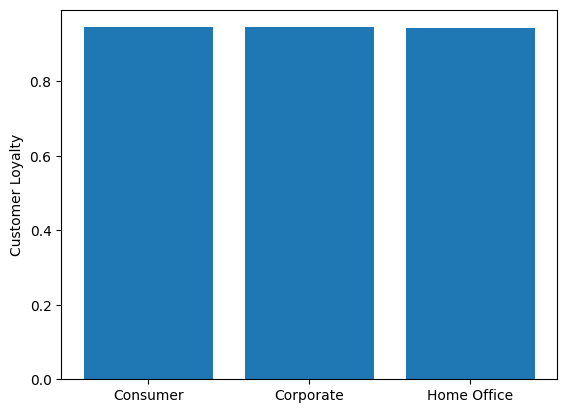

In [ ]:
# Create a bar chart to visualize customer loyalty by customer segment
fig, ax = plt.subplots()
ax.bar(loyalty_by_segment.index, loyalty_by_segment)
ax.set_ylabel('Customer Loyalty')
ax

The loyalty of customers varies by customer segment, product category, and order region. Here are the top 3 loyalty rates for each category:
***
**Customer Loyalty by Customer Segment:**
1. Consumer: 0.945210
2. Corporate: 0.944951
3. Home Office: 0.943617
***
**Customer Loyalty by Product Category:**
1. Golf Bags & Carts: 1.000000
1. Men's Golf Clubs: 1.000000
1. Tennis & Racquet: 1.000000
1. Women's Golf Clubs: 1.000000
***
**Customer Loyalty by Order Region:**
1. Central Africa: 0.998211
2. Southern Africa: 0.997407
3. Eastern Europe: 0.993878

### 5.4 Product Analysis

#### Product sales analysis
Product sales analysis is the process of examining and evaluating the performance of individual products or product categories in terms of sales data. It involves analyzing sales data to understand sales trends, patterns, and performance of products over a specific period of time. Product sales analysis provides insights into the sales performance of products, identifies top-selling products, and highlights areas for improvement or opportunities for growth.

In [ ]:
product_sales = df_analysis.groupby('Product_Name')['Sales'].sum().reset_index()
product_profit = df_analysis.groupby('Product_Name')['Total_Profit'].sum().reset_index()
product_avg_sales = df_analysis.groupby('Product_Name')['Sales'].mean().reset_index()
product_avg_profit = df_analysis.groupby('Product_Name')['Total_Profit'].mean().reset_index()
top_selling_products = product_sales.sort_values('Sales', ascending=False)

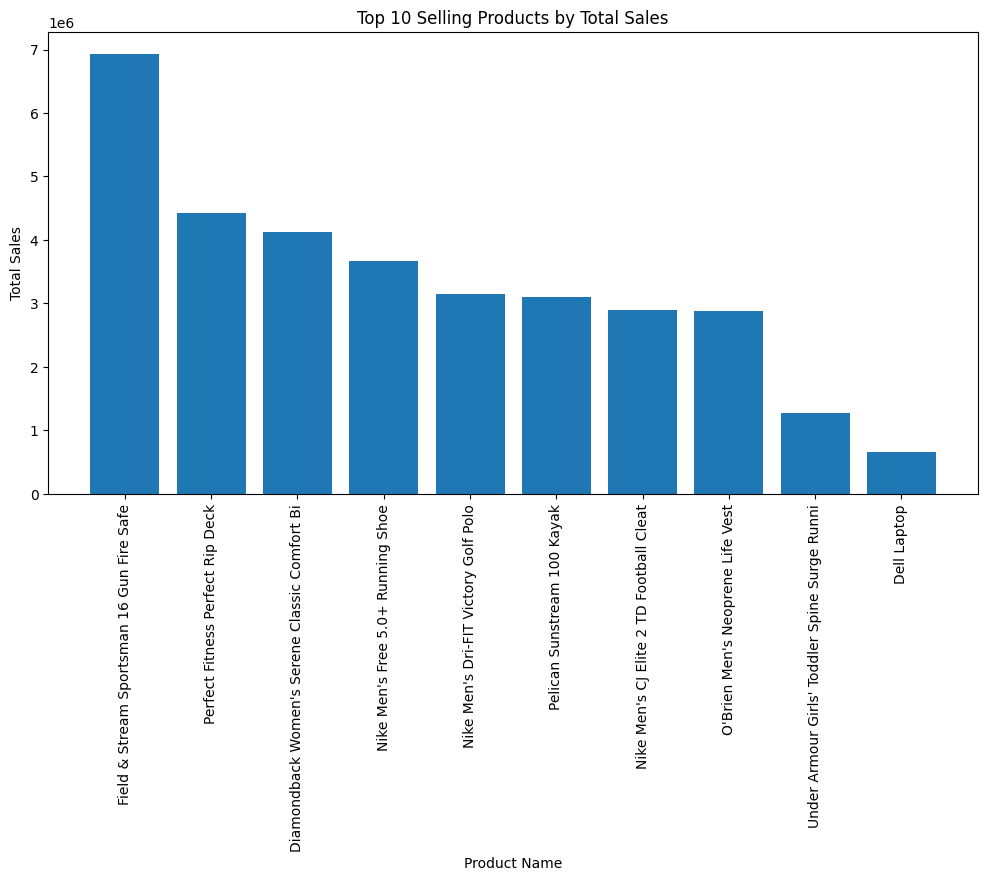

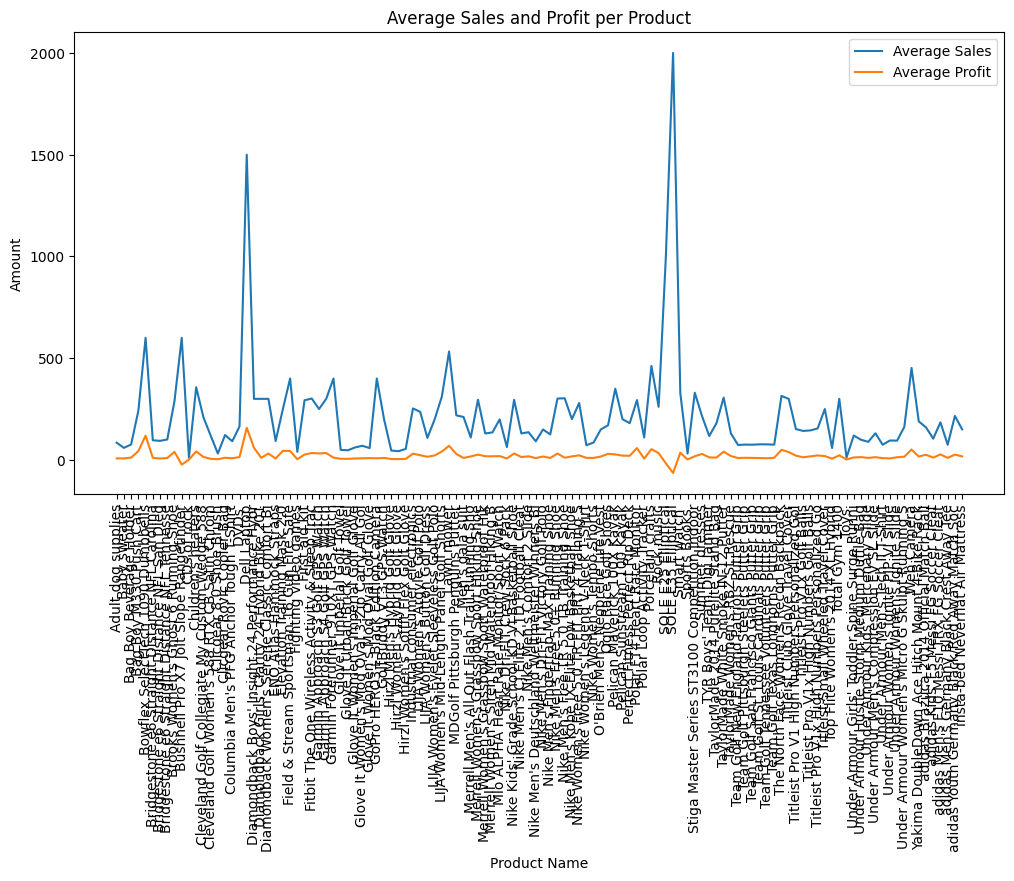

In [ ]:
# Bar chart for top selling products
plt.figure(figsize=(12, 6))
plt.bar(top_selling_products['Product_Name'][:10], top_selling_products['Sales'][:10])
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.title('Top 10 Selling Products by Total Sales')
plt.xticks(rotation=90)
plt.show()

# Line chart for average sales and profit per product
plt.figure(figsize=(12, 6))
plt.plot(product_avg_sales['Product_Name'], product_avg_sales['Sales'], label='Average Sales')
plt.plot(product_avg_profit['Product_Name'], product_avg_profit['Total_Profit'], label='Average Profit')
plt.xlabel('Product Name')
plt.ylabel('Amount')
plt.title('Average Sales and Profit per Product')
plt.legend()
plt.xticks(rotation=90)
plt.show()


#### Product profitability analysis
Product profitability analysis is the process of evaluating the profitability of individual products or product lines within a business. It involves analyzing financial data to understand the profitability of products and their contribution to the overall profitability of the business. Product profitability analysis provides insights into the revenue, costs, and margins associated with each product, helping businesses identify high-profit products, low-profit products, and areas for improvement.

In [ ]:
df_analysis['Profit_Margin'] = (df_analysis['Total_Profit'] / df_analysis['Sales']) * 100
total_profit_margin = df_analysis['Profit_Margin'].mean()
high_profit_products = df_analysis[df_analysis['Profit_Margin'] > total_profit_margin]['Product_Name'].unique()
df_analysis['Gross_Profit'] = df_analysis['Sales'] - df_analysis['Benefit_per_order']
df_analysis['Gross_Profit_Margin'] = (df_analysis['Gross_Profit'] / df_analysis['Sales']) * 100
df_analysis['Net_Profit_Margin'] = (df_analysis['Total_Profit'] / df_analysis['Sales']) * 100

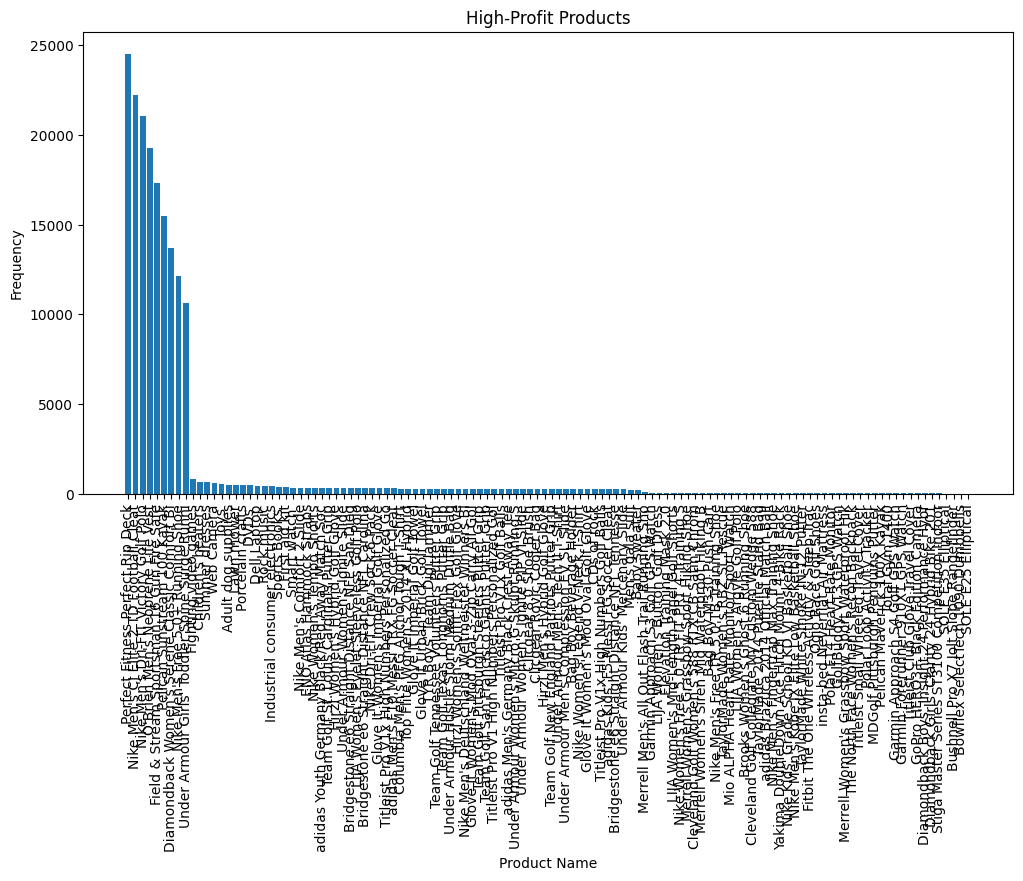

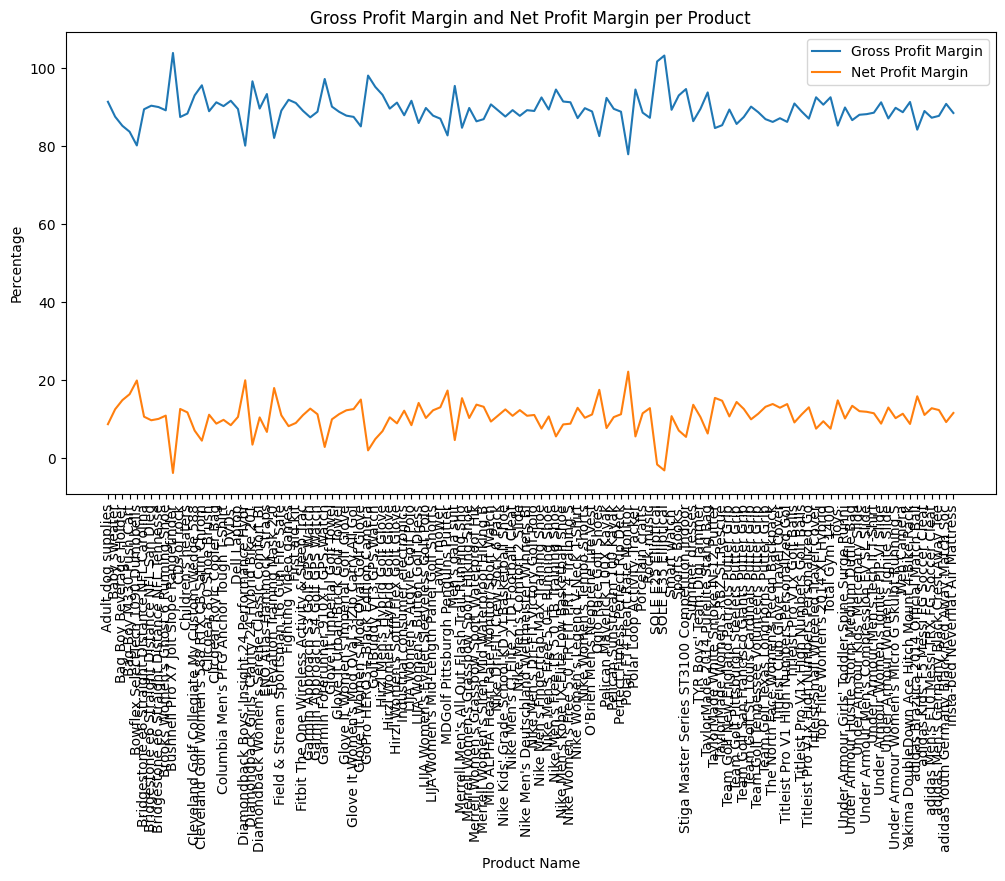

In [ ]:
# Bar chart for high-profit products
plt.figure(figsize=(12, 6))
plt.bar(df_analysis[df_analysis['Product_Name'].isin(high_profit_products)]['Product_Name'].value_counts().index,
        df_analysis[df_analysis['Product_Name'].isin(high_profit_products)]['Product_Name'].value_counts().values)
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.title('High-Profit Products')
plt.xticks(rotation=90)
plt.show()

# Line chart for gross profit margin and net profit margin per product
product_profit_margin = df_analysis.groupby('Product_Name')[['Gross_Profit_Margin', 'Net_Profit_Margin']].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(product_profit_margin['Product_Name'], product_profit_margin['Gross_Profit_Margin'], label='Gross Profit Margin')
plt.plot(product_profit_margin['Product_Name'], product_profit_margin['Net_Profit_Margin'], label='Net Profit Margin')
plt.xlabel('Product Name')
plt.ylabel('Percentage')
plt.title('Gross Profit Margin and Net Profit Margin per Product')
plt.legend()
plt.xticks(rotation=90)
plt.show()


In [ ]:
top_5_products = df_analysis.groupby('Product_Name')['Net_Profit_Margin'].mean().reset_index()
top_5_products = top_5_products.sort_values(by='Net_Profit_Margin', ascending=False).head(5)
top_5_products

,Product_Name,Net_Profit_Margin
72,Polar FT4 Heart Rate Monitor,22.111691
19,Diamondback Boys' Insight 24 Performance Hybr,19.895032
4,Bowflex SelectTech 1090 Dumbbells,19.846664
23,Elevation Training Mask 2.0,17.921511
68,Ogio Race Golf Shoes,17.455896


Top 5 products based on profit margin

#### Product category analysis
Product category analysis is the process of evaluating the performance and characteristics of different product categories within a business or market. It involves analyzing data related to sales, customer preferences, market trends, and other relevant metrics to gain insights into the performance of different product categories. Product category analysis provides businesses with a deeper understanding of the dynamics and opportunities within different product categories, helping them make informed decisions about product assortment, marketing strategies, and resource allocation.

In [ ]:
# Grouping the 'df_analysis' DataFrame by 'Category_Name' and aggregating the 'Sales' and 'Total_Profit' columns
product_category_analysis = df_analysis.groupby('Category_Name').agg({'Sales': 'sum', 'Total_Profit': 'sum'}).reset_index()

# Calculating the 'Profit_Margin' by dividing 'Total_Profit' by 'Sales'
product_category_analysis['Profit_Margin'] = product_category_analysis['Total_Profit'] / product_category_analysis['Sales']

# Sorting the 'product_category_analysis' DataFrame by 'Sales' column in descending order
product_category_analysis = product_category_analysis.sort_values(by='Sales', ascending=False)


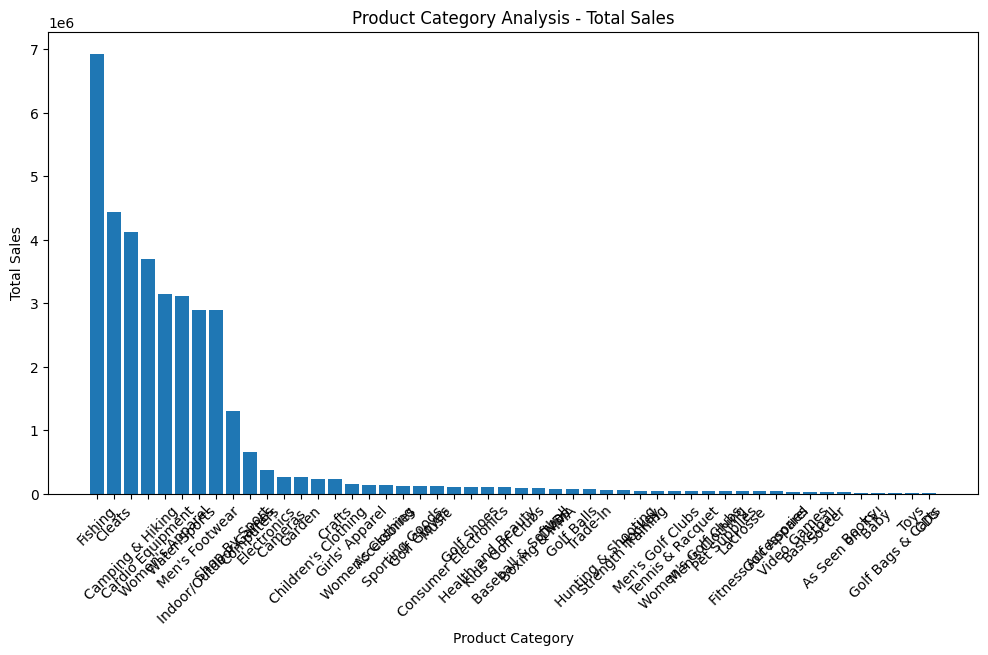

In [ ]:
# Creating a figure with a size of 12 inches by 6 inches
plt.figure(figsize=(12, 6))

# Creating a bar plot with 'Category_Name' on the x-axis and 'Sales' on the y-axis
plt.bar(product_category_analysis['Category_Name'], product_category_analysis['Sales'])

# Adding x-axis label
plt.xlabel('Product Category')

# Adding y-axis label
plt.ylabel('Total Sales')

# Adding plot title
plt.title('Product Category Analysis - Total Sales')

# Rotating x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


### 5.5 Order Analysis

In [ ]:
order_volume_by_status = df_analysis['Order_Status'].value_counts()
order_volume_by_region = df_analysis['Order_Region'].value_counts()
total_profit = df_analysis['Order_Profit_Per_Order'].sum()
avg_profit_margin = df_analysis['Order_Item_Profit_Ratio'].mean()

In [ ]:
# Calculating the count of each unique value in 'Order_Status' column and storing it in 'order_volume_by_status'
order_volume_by_status = df_analysis['Order_Status'].value_counts()

# Calculating the count of each unique value in 'Order_Region' column and storing it in 'order_volume_by_region'
order_volume_by_region = df_analysis['Order_Region'].value_counts()

# Calculating the sum of 'Order_Profit_Per_Order' column and storing it in 'total_profit'
total_profit = df_analysis['Order_Profit_Per_Order'].sum()

# Calculating the mean of 'Order_Item_Profit_Ratio' column and storing it in 'avg_profit_margin'
avg_profit_margin = df_analysis['Order_Item_Profit_Ratio'].mean()


### 5.6 Department Analysis

In [ ]:
# Grouping the 'df_analysis' DataFrame by 'Department_Name' and aggregating 'Sales', 'Total_Profit', and 'Order_Id'
# columns using sum, sum, and count functions respectively, and storing the result in 'department_performance'
department_performance = df_analysis.groupby('Department_Name').agg({'Sales': 'sum', 'Total_Profit': 'sum', 'Order_Id': 'count'})

# Renaming the 'Order_Id' column to 'Order_Count' using 'rename' function
department_performance.rename(columns={'Order_Id': 'Order_Count'}, inplace=True)

# Calculating the profit margin by dividing 'Total_Profit' by 'Sales' and storing it in 'Profit_Margin' column
department_performance['Profit_Margin'] = department_performance['Total_Profit'] / department_performance['Sales']

# Sorting the 'department_performance' DataFrame by 'Sales' column in descending order
department_performance = department_performance.sort_values('Sales', ascending=False)


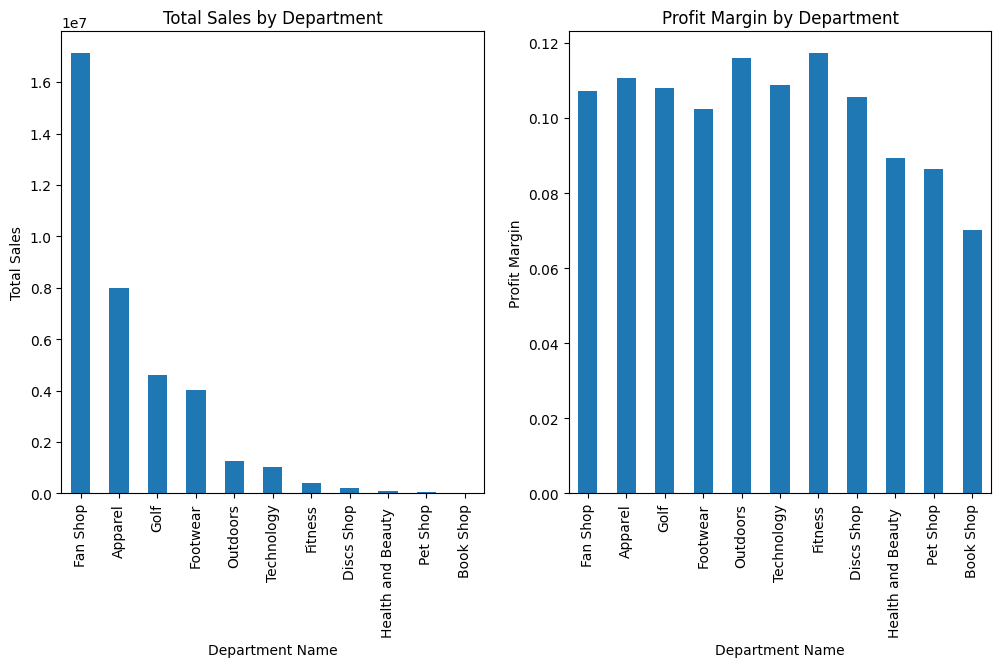

In [ ]:
# Creating a figure with a size of 12x6 inches
plt.figure(figsize=(12, 6))

# Creating a subplot with 1 row, 2 columns, and selecting the first subplot
plt.subplot(1, 2, 1)

# Creating a bar plot for 'Sales' column in 'department_performance' DataFrame
department_performance['Sales'].plot(kind='bar')

# Adding labels and title to the plot
plt.xlabel('Department Name')
plt.ylabel('Total Sales')
plt.title('Total Sales by Department')

# Creating a subplot with 1 row, 2 columns, and selecting the second subplot
plt.subplot(1, 2, 2)

# Creating a bar plot for 'Profit_Margin' column in 'department_performance' DataFrame
department_performance['Profit_Margin'].plot(kind='bar')

# Adding labels and title to the plot
plt.xlabel('Department Name')
plt.ylabel('Profit Margin')
plt.title('Profit Margin by Department')

# Displaying the plot
plt.show()


### 5.7 Geographic Analysis

In [ ]:
# Sales and profitability by market
market_analysis = df_analysis.groupby('Market').agg({'Sales': 'sum', 'Total_Profit': 'sum', 'Order_Id': 'count'})
market_analysis.rename(columns={'Order_Id': 'Order_Count'}, inplace=True)
market_analysis['Profit_Margin'] = market_analysis['Total_Profit'] / market_analysis['Sales']
market_analysis = market_analysis.sort_values('Sales', ascending=False)

# Sales and profitability by country
country_analysis = df_analysis.groupby('Order_Country').agg({'Sales': 'sum', 'Total_Profit': 'sum', 'Order_Id': 'count'})
country_analysis.rename(columns={'Order_Id': 'Order_Count'}, inplace=True)
country_analysis['Profit_Margin'] = country_analysis['Total_Profit'] / country_analysis['Sales']
country_analysis = country_analysis.sort_values('Sales', ascending=False)

# Sales and profitability by state
state_analysis = df_analysis.groupby('Order_State').agg({'Sales': 'sum', 'Total_Profit': 'sum', 'Order_Id': 'count'})
state_analysis.rename(columns={'Order_Id': 'Order_Count'}, inplace=True)
state_analysis['Profit_Margin'] = state_analysis['Total_Profit'] / state_analysis['Sales']
state_analysis = state_analysis.sort_values('Sales', ascending=False)

# Sales and profitability by city
city_analysis = df_analysis.groupby('Order_City').agg({'Sales': 'sum', 'Total_Profit': 'sum', 'Order_Id': 'count'})
city_analysis.rename(columns={'Order_Id': 'Order_Count'}, inplace=True)
city_analysis['Profit_Margin'] = city_analysis['Total_Profit'] / city_analysis['Sales']
city_analysis = city_analysis.sort_values('Sales', ascending=False)

# Sales and profitability by latitude and longitude
lat_lon_analysis = df_analysis.groupby(['Latitude', 'Longitude']).agg({'Sales': 'sum', 'Total_Profit': 'sum', 'Order_Id': 'count'})
lat_lon_analysis.rename(columns={'Order_Id': 'Order_Count'}, inplace=True)
lat_lon_analysis['Profit_Margin'] = lat_lon_analysis['Total_Profit'] / lat_lon_analysis['Sales']
lat_lon_analysis = lat_lon_analysis.sort_values('Sales', ascending=False)


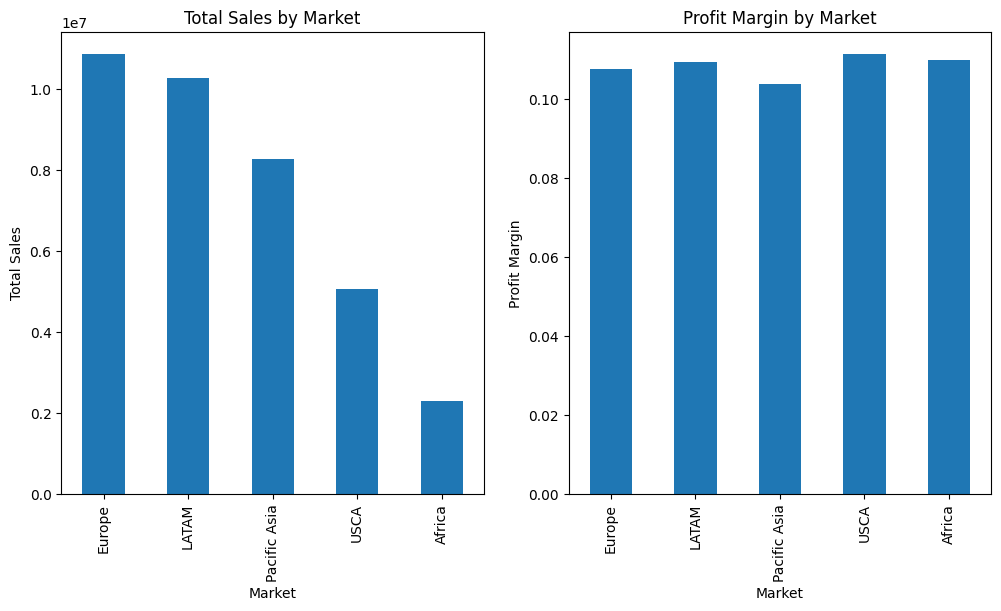

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Market analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
market_analysis['Sales'].plot(kind='bar')
plt.xlabel('Market')
plt.ylabel('Total Sales')
plt.title('Total Sales by Market')

plt.subplot(1, 2, 2)
market_analysis['Profit_Margin'].plot(kind='bar')
plt.xlabel('Market')
plt.ylabel('Profit Margin')
plt.title('Profit Margin by Market')

plt.show()

# Country analysis
plt.figure(figsize=(12, 6))


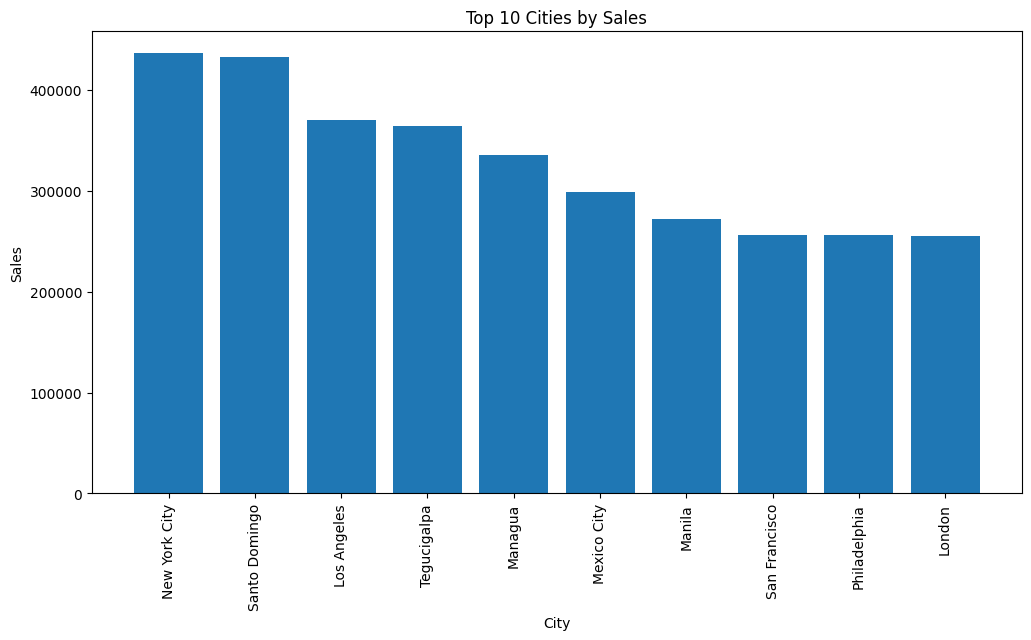

In [ ]:
# Create a bar chart for sales and profitability by city

# Filter the top 10 cities based on sales
top_10_cities = city_analysis.head(10)

# Create a bar graph for sales by city
plt.figure(figsize=(12, 6))
plt.bar(top_10_cities.index, top_10_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 10 Cities by Sales')
plt.xticks(rotation=90)
plt.show()

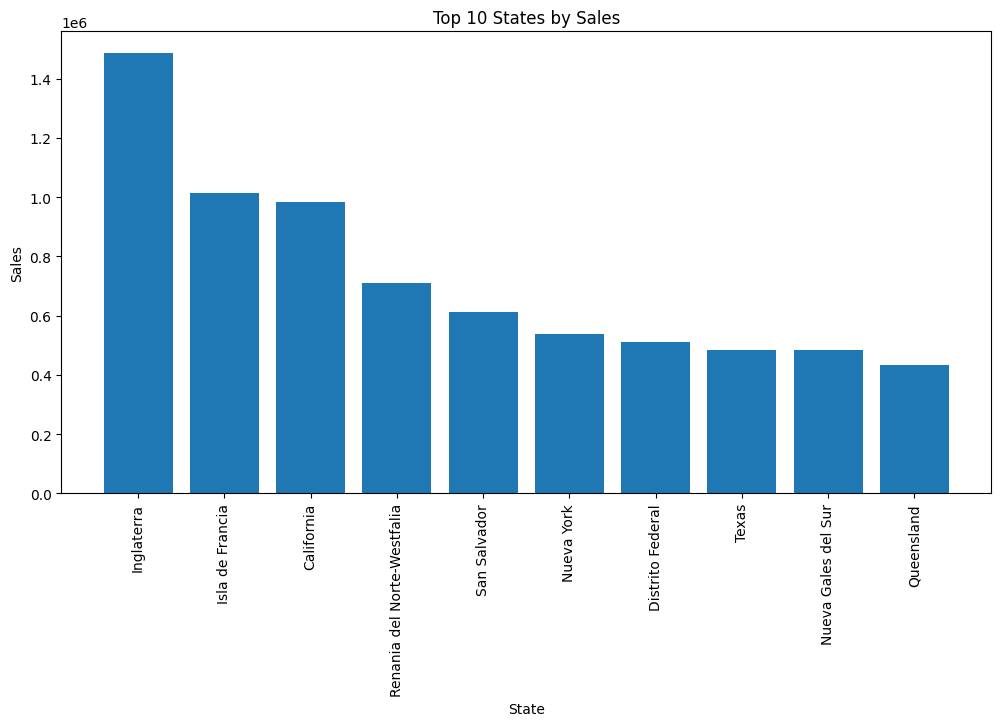

In [ ]:
# Filter the top 10 states based on sales
top_10_states = state_analysis.head(10)

# Create a bar graph for sales by state
plt.figure(figsize=(12, 6))
plt.bar(top_10_states.index, top_10_states['Sales'])
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Top 10 States by Sales')
plt.xticks(rotation=90)
plt.show()

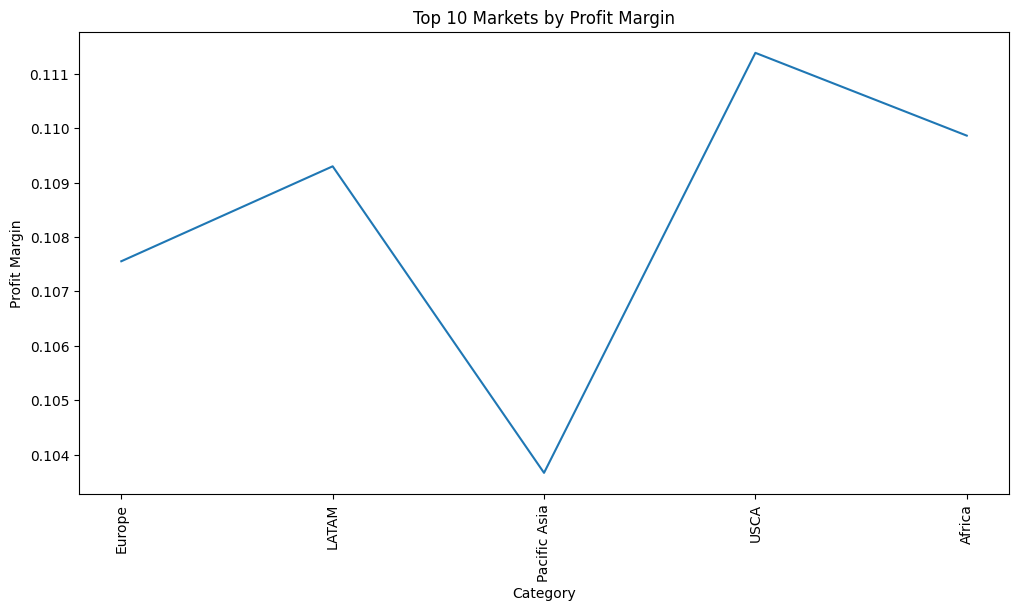

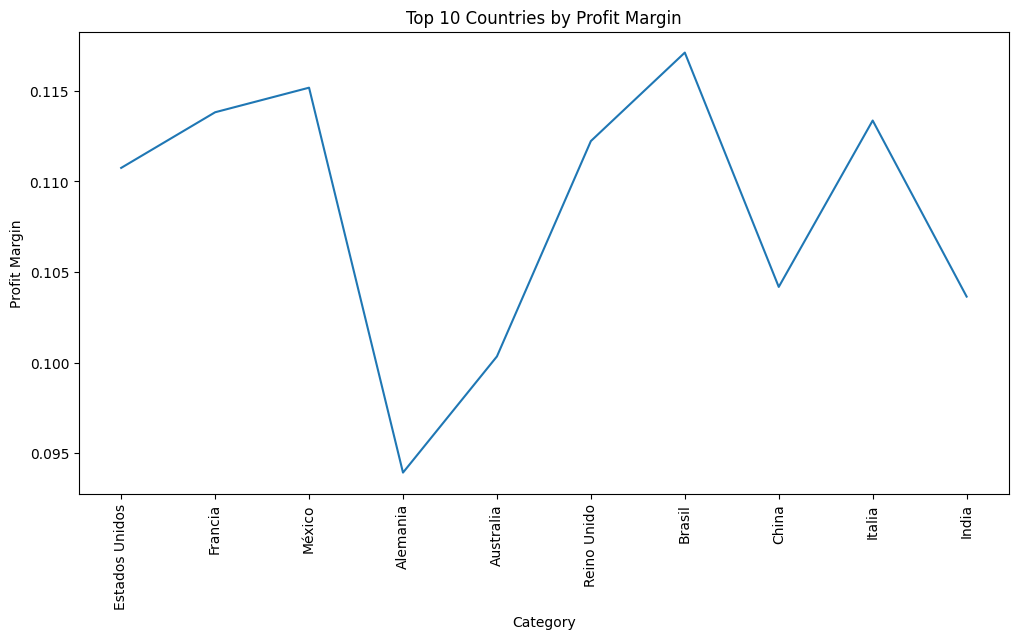

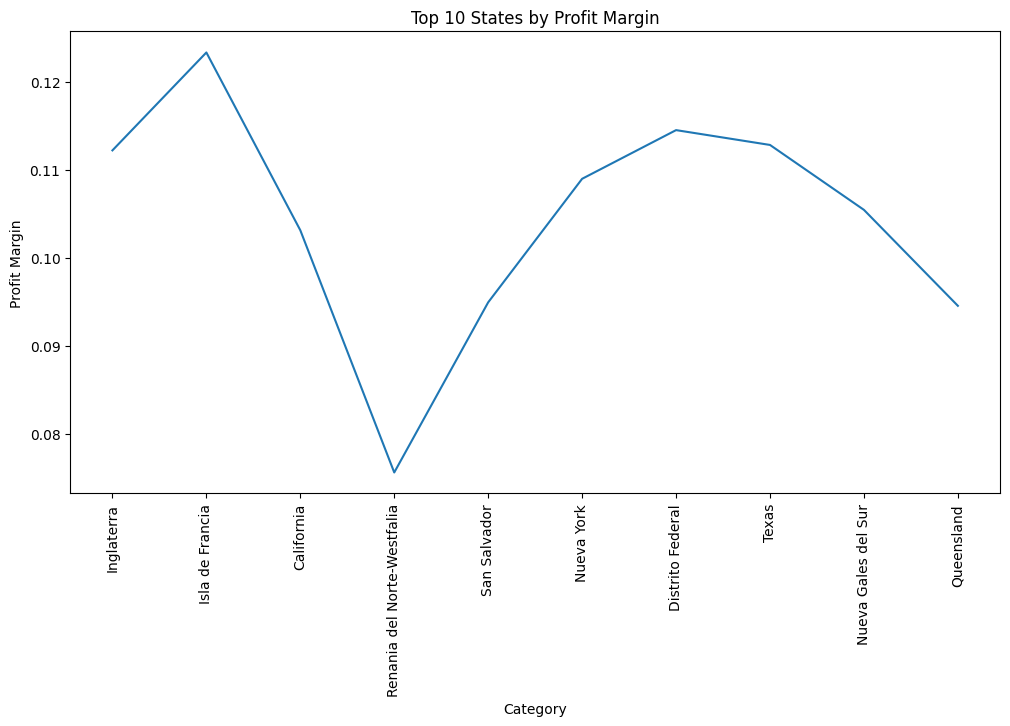

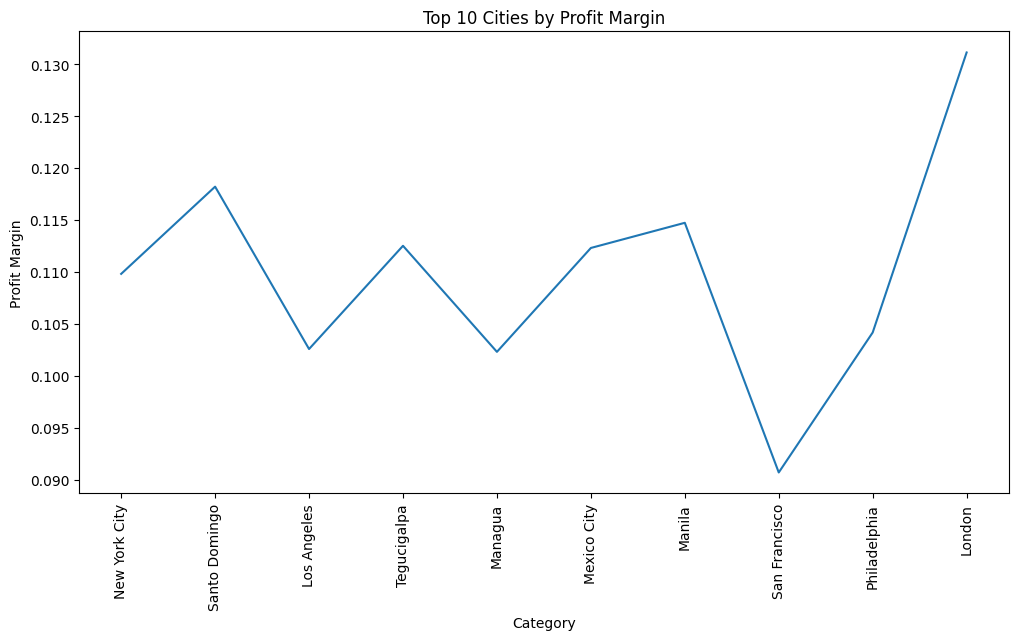

In [ ]:
# Define a function to plot line chart
def plot_line_chart(dataframe, title):
    top_10 = dataframe.head(10)
    plt.figure(figsize=(12, 6))
    plt.plot(top_10.index, top_10['Profit_Margin'])
    plt.xlabel('Category')
    plt.ylabel('Profit Margin')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

# Plot line chart for market
plot_line_chart(market_analysis, 'Top 10 Markets by Profit Margin')

# Plot line chart for country
plot_line_chart(country_analysis, 'Top 10 Countries by Profit Margin')

# Plot line chart for state
plot_line_chart(state_analysis, 'Top 10 States by Profit Margin')

# Plot line chart for city
plot_line_chart(city_analysis, 'Top 10 Cities by Profit Margin')

In [ ]:
df_analysis.to_csv('analysis_dataset.csv', index=False)

## 6.  Machine Learning

### 6.1 Binary classification model for late delivery

In [ ]:
# Install the 'pycaret' library using 'pip' package manager
!pip install pycaret

# Import all the classification related functions and classes from the 'pycaret' library
from pycaret.classification import *


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_train = df.copy()

In [ ]:
df_train.head(2)

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,Customer_Country,Customer_Id,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Department_Id,Department_Name,Latitude,Longitude,Market,Order_City,Order_Country,Order_Customer_Id,order_date_(DateOrders),Order_Id,Order_Item_Cardprod_Id,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Region,Order_State,Order_Status,Product_Card_Id,Product_Category_Id,Product_Name,Product_Price,Product_Status,shipping_date_(DateOrders),Shipping_Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class


In [ ]:
# Create a new column 'late_delivery' in the df_train DataFrame
# Use the np.where() function to check if the value in the 'Delivery_Status' column is 'Late delivery'
# If the condition is True, set the value in the 'late_delivery' column to 1, otherwise set it to 0
df_train['late_delivery'] = np.where(df_train['Delivery_Status'] == 'Late delivery', 1, 0)


In [ ]:
#Drop columns with repeated values to avoid multicollinearity 
df_train.drop(['Delivery_Status','Late_delivery_risk','Order_Status','order_date_(DateOrders)'], axis=1, inplace=True)

In [ ]:
df_train.head(2)

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Category_Id,Category_Name,Customer_City,Customer_Country,Customer_Id,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Department_Id,Department_Name,Latitude,Longitude,Market,Order_City,Order_Country,Order_Customer_Id,Order_Id,Order_Item_Cardprod_Id,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Region,Order_State,Product_Card_Id,Product_Category_Id,Product_Name,Product_Price,Product_Status,shipping_date_(DateOrders),Shipping_Mode,late_delivery
0,DEBIT,3,4,91.250000,314.640015,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,0
1,TRANSFER,5,4,-249.089996,311.359985,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,1


In [ ]:
df_train.shape

(180516, 43)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# list of categorical columns to be encoded
categorical_cols = ['Type', 'Category_Name', 'Customer_City', 'Customer_Country', 'Customer_Segment',
                    'Customer_State', 'Customer_Street', 'Department_Name', 'Market', 'Order_City',
                    'Order_Country', 'Order_Region', 'Order_State', 'Product_Name', 'Product_Status',
                    'shipping_date_(DateOrders)', 'Shipping_Mode']

# loop through the categorical columns and apply label encoding
for col in categorical_cols:
    if col in df_train.columns:
        df_train[col] = le.fit_transform(df_train[col])

# display the updated DataFrame
df_train.head()

,Type,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Category_Id,Category_Name,Customer_City,Customer_Country,Customer_Id,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Department_Id,Department_Name,Latitude,Longitude,Market,Order_City,Order_Country,Order_Customer_Id,Order_Id,Order_Item_Cardprod_Id,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Region,Order_State,Product_Card_Id,Product_Category_Id,Product_Name,Product_Price,Product_Status,shipping_date_(DateOrders),Shipping_Mode,late_delivery
0,1,3,4,91.250000,314.640015,73,40,65,1,20755,0,34,3683,725.0,2,4,18.251453,-66.037056,3,331,70,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,15,475,1360,73,78,327.75,0,27147,3,0
1,3,5,4,-249.089996,311.359985,73,40,65,1,19492,0,34,1400,725.0,2,4,18.279451,-66.037064,3,391,69,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,13,841,1360,73,78,327.75,0,2209,3,1
2,0,4,4,-247.779999,309.720001,73,40,451,0,19491,0,3,6217,95125.0,2,4,37.292233,-121.881279,3,391,69,19491,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,13,841,1360,73,78,327.75,0,1980,3,0
3,1,3,4,22.860001,304.809998,73,40,284,0,19490,2,3,1803,90027.0,2,4,34.125946,-118.291016,3,3226,8,19490,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,11,835,1360,73,78,327.75,0,1752,3,0
4,2,2,4,134.210007,298.250000,73,40,65,1,19489,1,34,6345,725.0,2,4,18.253769,-66.037048,3,3226,8,19489,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,11,835,1360,73,78,327.75,0,1528,3,0


#### Detecting Late Delivery

In [ ]:
# Get count of 'late_delivery' column
late_delivery_count = df_train['late_delivery'].value_counts()

# Print count
print(late_delivery_count)

1    98976
0    81540
Name: late_delivery, dtype: int64


We see that our dataset is almost balanced. 

In [ ]:
from pycaret.classification import setup, compare_models

# Set up PyCaret experiment
exp_clf = setup(data=df_train, target='late_delivery', normalize=True, verbose=False)

In [ ]:
exp_clf

In [ ]:
# Compare models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9838,0.9837,0.9840,0.9864,0.9852,0.9672,0.9672,1.6660
xgboost,Extreme Gradient Boosting,0.9822,0.9983,0.9992,0.9693,0.9840,0.9640,0.9646,25.3910
rf,Random Forest Classifier,0.9807,0.9988,1.0000,0.9660,0.9827,0.9609,0.9616,24.7580
et,Extra Trees Classifier,0.9800,0.9974,0.9999,0.9649,0.9821,0.9594,0.9602,14.8020
lightgbm,Light Gradient Boosting Machine,0.9769,0.9978,0.9999,0.9597,0.9794,0.9532,0.9542,2.9580
gbc,Gradient Boosting Classifier,0.9756,0.9944,1.0000,0.9574,0.9782,0.9505,0.9517,53.1470
lr,Logistic Regression,0.9755,0.9804,1.0000,0.9573,0.9782,0.9504,0.9515,1.4070
svm,SVM - Linear Kernel,0.9755,0.0000,1.0000,0.9572,0.9781,0.9503,0.9515,0.7110
ridge,Ridge Classifier,0.9652,0.0000,0.9792,0.9582,0.9686,0.9295,0.9298,0.5470
lda,Linear Discriminant Analysis,0.9652,0.9780,0.9792,0.9582,0.9686,0.9295,0.9298,1.1760


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Decision Tree (dt) is the best performing model for our dataset on 5 of 7 metrics. Therefore, we go ahead with it.

In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9839,0.9838,0.9841,0.9864,0.9853,0.9674,0.9674
1,0.9817,0.9816,0.9824,0.9842,0.9833,0.9631,0.9631
2,0.9857,0.9857,0.9854,0.9884,0.9869,0.9711,0.9711
3,0.9839,0.9838,0.9851,0.9856,0.9853,0.9676,0.9676
4,0.9825,0.9825,0.9827,0.9854,0.9840,0.9647,0.9647
5,0.9832,0.9831,0.9841,0.9853,0.9847,0.9661,0.9661
6,0.9818,0.9817,0.9824,0.9844,0.9834,0.9633,0.9633
7,0.9854,0.9854,0.9847,0.9886,0.9866,0.9705,0.9705
8,0.9848,0.9850,0.9834,0.9888,0.9861,0.9693,0.9694


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=4490, splitter='best')


In [ ]:
# Model can be futher tuned but is a computationally and time intensive process. Hence, hasn't been executed
# As high accuracy has already been achieved
# tuned_dt = tune_model(dt, n_iter =200)

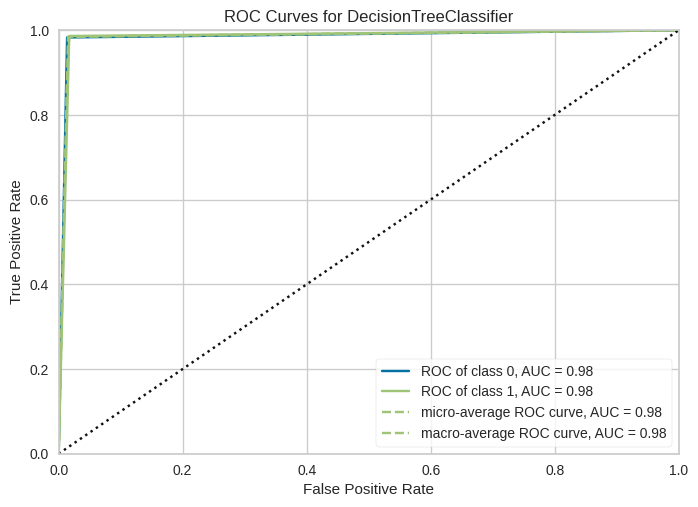

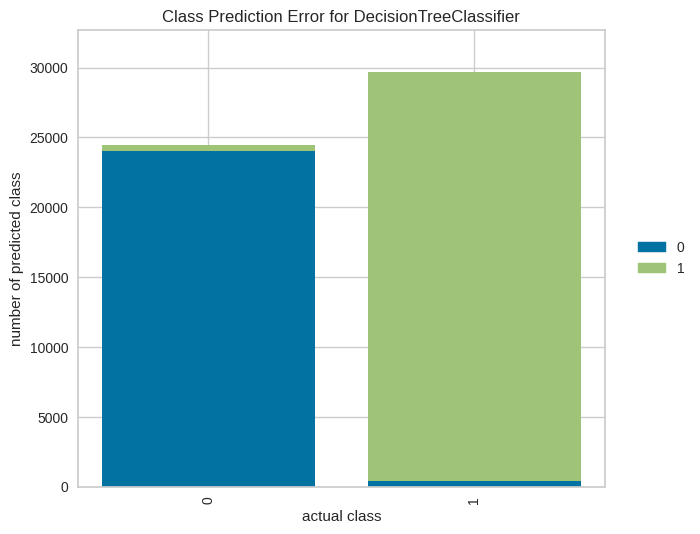

In [ ]:
# Plot the trained model (dt) using the default visualization, which depends on the type of model
plot_model(dt)

# Plot the trained model (dt) with an error plot, which shows the performance of the model in terms of error
plot_model(dt, plot='error')


We see that the ROC curve is almost perfect. Alos the False positives and False Negatives are minimal. Therefore, we can use this model for late_delivery classification prediction.

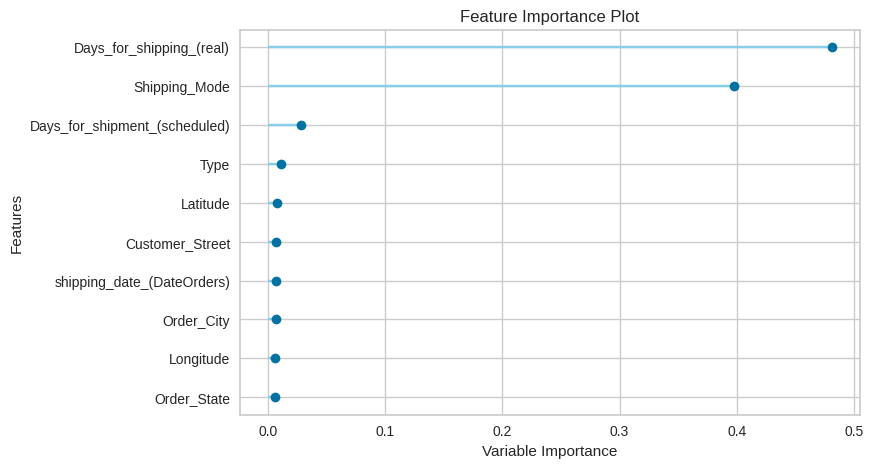

In [ ]:
# Plot the feature importance of the trained decision tree model (dt)
plot_model(dt, plot='feature')


Features important to this model in decreasing order are: 
1. Days_for_shipping(real)
2. Shipping_Mode
3. days_for_shipment(scheduled)

In [ ]:
# Finalize the trained decision tree model (dt) for deployment
final_dt = finalize_model(dt)
print(final_dt)


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Type', 'Days_for_shipping_(real)',
                                             'Days_for_shipment_(scheduled)',
                                             'Benefit_per_order',
                                             'Sales_per_customer',
                                             'Category_Id', 'Category_Name',
                                             'Customer_City',
                                             'Customer_Country', 'Customer_Id',
                                             'Customer_Segment',
                                             'Customer_State',
                                             'Customer_...
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 Decision

In [ ]:
# Save the finalized decision tree model (final_dt) with a given name ('DT Model for late delivery')
save_model(final_dt, 'DT Model for late delivery')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Type', 'Days_for_shipping_(real)',
                                              'Days_for_shipment_(scheduled)',
                                              'Benefit_per_order',
                                              'Sales_per_customer',
                                              'Category_Id', 'Category_Name',
                                              'Customer_City',
                                              'Customer_Country', 'Customer_Id',
                                              'Customer_Segment',
                                              'Customer_State',
                                              'Customer_...
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('actual_estimator',
          



```
# This is formatted as code
```

### 6.2 Predicting Sales through RNN
Forecasting sales through Recurrent Neural Networks (RNN) is a popular and effective approach in time series analysis. RNNs are a type of deep learning model that can capture and learn patterns in sequential data, making them well-suited for forecasting tasks where the order of data points matters, such as sales data.

The outline of the RNN process in the following code involves the following steps:

1. Data preparation: The sales data is preprocessed and split into training and testing sets. The training set is used to train the RNN model, while the testing set is used to evaluate the model's performance.

2. Feature scaling: The training data is scaled using Min-Max scaling, which normalizes the data to a specific range (e.g., [0, 1]) to ensure that all features are on a similar scale and prevent one feature from dominating others during training.

3. Model architecture: An RNN model is defined using the Keras library with LSTM (Long Short-Term Memory) layers. The model consists of an LSTM layer with 64 units and a dense output layer with a linear activation function.

4. Model training: The RNN model is trained on the training data using the Adam optimizer and Mean Squared Error (MSE) loss function. The model is trained for a specified number of epochs (iterations) and a batch size of 32.

5. Model prediction: The trained RNN model is used to make sales forecasts on the testing data. The predicted sales values are then inverse-scaled to obtain the original scale of the data for evaluation.

6. Model evaluation: The accuracy of the RNN model is evaluated using metrics such as MSE, RMSE, and MAPE, which provide insights into the accuracy and performance of the model's forecasts.

7. Model saving: Finally, the trained RNN model is saved as a "forecasting_sales_rnn.h5" file using the Keras' model.save() function, allowing for future reuse without retraining the model.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
# Load and preprocess the data
X = df_train.drop('Sales', axis=1)
y = df_train['Sales']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1)  # Reshape predictions to 1D array




Epoch 1/100
4513/4513 [==============================] - 14s 3ms/step - loss: 29416.8574
Epoch 2/100
4513/4513 [==============================] - 13s 3ms/step - loss: 11892.9336
Epoch 3/100
4513/4513 [==============================] - 12s 3ms/step - loss: 4077.9272
Epoch 4/100
4513/4513 [==============================] - 12s 3ms/step - loss: 2914.6279
Epoch 5/100
4513/4513 [==============================] - 12s 3ms/step - loss: 2491.4641
Epoch 6/100
4513/4513 [==============================] - 12s 3ms/step - loss: 2185.3984
Epoch 7/100
4513/4513 [==============================] - 12s 3ms/step - loss: 1907.2576
Epoch 8/100
4513/4513 [==============================] - 12s 3ms/step - loss: 1647.4264
Epoch 9/100
4513/4513 [==============================] - 12s 3ms/step - loss: 1412.6505
Epoch 10/100
4513/4513 [==============================] - 12s 3ms/step - loss: 1188.8987
Epoch 11/100
4513/4513 [==============================] - 12s 3ms/step - loss: 990.2443
Epoch 12/100
4513/4513 [=====

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculates the mean absolute percentage error (MAPE) between two arrays.

    Parameters:
        -- y_true (array-like): Array of true values.
        -- y_pred (array-like): Array of predicted values.

    Returns:
        -- float: Mean absolute percentage error (MAPE).
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("MAPE: {:.2f}%".format(mape))

MSE: 0.09
RMSE: 0.30
MAPE: 19.92%


The values provided are performance metrics for evaluating a forecasting model. Here's how to interpret them:

- **MSE (Mean Squared Error)**: MSE measures the average squared difference between the predicted values and the actual values. A lower MSE value indicates better accuracy, as it means the predicted values are closer to the actual values. In this case, an MSE of 0.06 means that, on average, the squared difference between the predicted and actual values is 0.06.

- **RMSE (Root Mean Squared Error)**: RMSE is the square root of MSE and is commonly used as a measure of the model's prediction error. It has the same unit as the target variable, and a lower RMSE value indicates better accuracy. In this case, an RMSE of 0.25 means that, on average, the predicted values deviate from the actual values by 0.25 units.

- **MAPE (Mean Absolute Percentage Error)**: MAPE measures the percentage difference between the predicted and actual values, relative to the actual values. It is expressed as a percentage, and lower MAPE values indicate better accuracy. In this case, a MAPE of 13.12% means that, on average, the predicted values deviate from the actual values by 13.12% of the actual values.

*Lower values of MSE, RMSE, and MAPE indicate better accuracy and performance of the forecasting model.*

In [ ]:
# Save the trained RNN model
model.save('forecasting_sales_rnn.h5')
print("Model saved as 'forecasting_sales_rnn.h5'")


Model saved as 'forecasting_sales_rnn.h5'


## 7. Conclusion
Based on the analysis of the provided dataset and the identification of key challenges and opportunities within the smart supply chain, several conclusions can be drawn:

1. Late deliveries are a significant concern: The high rate of late deliveries, as evidenced by the 54.83% late delivery rate, indicates that there are likely inefficiencies or bottlenecks in the supply chain process that need to be addressed. Improved tracking and visibility, streamlined transportation and logistics, and optimized inventory management could be potential areas of focus to reduce late deliveries and enhance on-time delivery performance.

2. Customer retention is critical: The high churn rate of 90.04% suggests that there may be issues with customer satisfaction, loyalty, or retention. It is crucial for the smart supply chain to understand customer behavior, preferences, and pain points to improve customer retention strategies. Enhanced customer engagement, personalized experiences, and efficient order fulfillment can be potential strategies to reduce churn rate and improve customer loyalty.

3. Product profitability should be optimized: The need for product profitability analysis and identification of top-performing products based on profit margin highlights the importance of optimizing product mix and pricing strategies. By identifying and leveraging high-margin products, the smart supply chain can drive overall profitability and make informed decisions on inventory management, procurement, and pricing.

4. Accurate sales forecasting is critical: The use of advanced analytics and machine learning techniques for sales forecasting, such as RNN and LSTM with Monte Carlo Method, can provide valuable insights for demand planning and inventory management. Accurate sales forecasting can help the smart supply chain optimize inventory levels, reduce stockouts, and mitigate the impact of demand uncertainty, resulting in improved operational efficiency and customer satisfaction.

5. Department and geographic insights are valuable: The department and geographic analysis can provide valuable insights into operational trends, customer preferences, and regional demands. Leveraging these insights, the smart supply chain can optimize operations, streamline processes, and customize strategies to meet customer demands effectively in different regions or departments.
***

6. Based on the performance metrics of the classification model using a decision tree with an accuracy of 98.40% and an AUC (Area Under the Curve) of approximately 99%, the following conclusions can be drawn:

- High accuracy: The accuracy of 98.40% indicates that the decision tree model is highly accurate in predicting the class labels for the given dataset. This suggests that the model is performing well in correctly classifying the instances into their respective categories.

- Excellent AUC: The AUC of around 99% is an excellent performance metric for a classification model, indicating that the model has a high ability to discriminate between the positive and negative class instances. A high AUC suggests that the model is effective in capturing the true positive rate and false positive rate, and has a strong ability to correctly rank instances according to their predicted probabilities.

- Robust predictive power: The high accuracy and AUC values of the decision tree model suggest that it has robust predictive power in terms of identifying and classifying instances into their correct categories. This indicates that the model is likely to perform well on unseen data and has the potential to be used in real-world scenarios for accurate classification tasks.

- Reliable decision-making: The decision tree model with such high accuracy and AUC values can serve as a reliable tool for making informed decisions based on the predicted class labels. It can be used for various applications, such as customer segmentation, fraud detection, medical diagnosis, or any other domain where accurate classification is critical.

- Potential for business impact: The high performance of the decision tree model with an accuracy of 98.40% and an AUC of around 99% suggests that it has the potential to deliver significant business impact. Accurate classification can lead to improved operational efficiency, better customer targeting, reduced costs, and increased revenue, among other benefits.
***

7. Based on RNN metrics for sales forecasting, the following conclusions can be drawn:

- Accurate forecasts: The RNN model is capable of making accurate forecasts with low prediction errors, as indicated by the low MSE, RMSE, and MAPE values. This suggests that the model is able to capture patterns and trends in the data, and is making reliable predictions.

- Reliable performance: The low MSE and RMSE values indicate that the RNN model is consistently performing well in terms of accuracy and precision in its forecasts. The MAPE value of 19.92% suggests that the percentage difference between predicted and actual values is relatively small, indicating reliable performance.

- Useful forecasting tool: The RNN model with these performance metrics can be considered as a useful forecasting tool in various domains, such as finance, supply chain management, demand forecasting, and others, where accurate predictions are crucial for decision-making and planning purposes.

- Potential for improvement: While the RNN model is performing well with low prediction errors, there may still be room for improvement in terms of reducing the MSE, RMSE, and MAPE values. Further experimentation with hyperparameter tuning, model architecture, and data preprocessing techniques may potentially lead to even better forecasting performance.
***